# 구현으로 배우는 딥러닝 이해_2

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>div.container {width:100% !important; }</style>'))

In [ ]:
# !pip uninstall tensorflow
# !pip uninstall keras 

In [ ]:
# !pip install tensorflow==2.3.0
# !pip install keras==2.4.3

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [116]:
import keras
print(keras.__version__)

2.4.3


## 2. 딥러닝을 위한 수학

### 2.1 MSE(Mean Squared Error)

Epoch 1/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.2000
Epoch 2/10
5/5 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 0.2000
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 3.0079e-04 - accuracy: 0.2000
Epoch 4/10
5/5 [==============================] - 0s 1ms/step - loss: 1.9022e-04 - accuracy: 0.2000
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 1.8897e-04 - accuracy: 0.2000
Epoch 6/10
5/5 [==============================] - 0s 1ms/step - loss: 1.8483e-04 - accuracy: 0.2000
Epoch 7/10
5/5 [==============================] - 0s 1ms/step - loss: 1.7890e-04 - accuracy: 0.2000
Epoch 8/10
5/5 [==============================] - 0s 1ms/step - loss: 1.7270e-04 - accuracy: 0.2000
Epoch 9/10
5/5 [==============================] - 0s 1ms/step - loss: 1.6661e-04 - accuracy: 0.2000
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 1.6071e-04 - accuracy: 0.2000


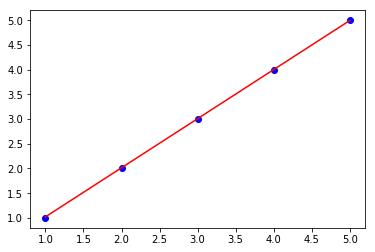

In [4]:
# 케라스로 구현한 선형 회귀 --- p.6

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5])
Y = np.array([1,2,3,4,5])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(X,Y, batch_size=1, epochs=10, shuffle=False)

plt.plot(X,Y,'bo')
plt.plot(X, model.predict(X), 'r-')
plt.show()

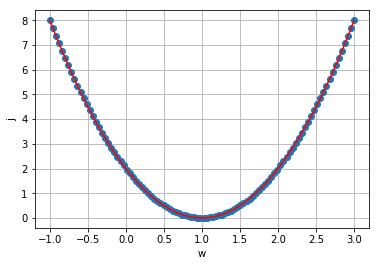

In [3]:
# Cost function (x축:w, y축:j) --- p.14

import numpy as np
import matplotlib.pyplot as plt

w = np.linspace(-1,3,100)
b=0
#print(w)

j = np.zeros(100)
for i in range(len(w)):
    y_hat = w[i]*2 + b
    j[i] = 0.5 * (y_hat - 2) **2 
    
plt.plot(w,j,'o')
plt.plot(w,j,'r-')
plt.grid(True)
plt.xlabel('w')
plt.ylabel('j')
plt.show()

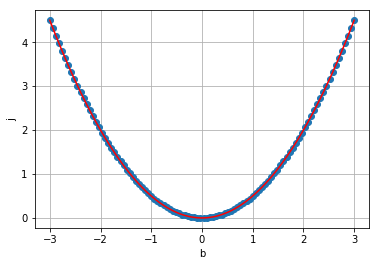

In [5]:
# Cost function (x축:b, y축:j) --- p.20

import numpy as np
import matplotlib.pyplot as plt

w = 1
b = np.linspace(-3,3,100)
j = np.zeros(100)

for i in range(len(b)):
    y_hat = w*2 + b[i]
    j[i] = 0.5 * (y_hat - 2) **2
    
plt.plot(b,j,'o')
plt.plot(b,j,'-r')
plt.grid(True)
plt.xlabel('b')
plt.ylabel('j')
plt.show()

### 2.2 SGD (Stochastic Gradient Descent) --- p.21
```
개념
- 비용 함수(J(w,b)) 최소화 목적(경사 하강은 많은 최소화 문제에 사용됨)
- 주어진 비용 함수, 비용 (W, b)에 대해 비용을 최소화하기 위해 W, b를 찾는다.
- 일반적인 함수 : 비용 (w1, w2,…)에 적용 가능

작동 방식
- 초기 추측으로 시작
    ▪ 0,0 (또는 다른 값)에서 시작
    ▪ W와 b를 약간 변경하여 cost(W, b)의 비용을 줄이려고 노력
- 매개 변수를 변경할 때마다 가능한 가장 낮은 cost(W, b)을 감소시키는 기울기를 선택
- 반복
- 최소한의 지역으로 수렴 할 때까지 수행

정리
- 경사하강법은 비용함수를 최소화하기 위해 사용되는 개념임
    ▪ 비용함수는 J(w,b) = 1/2(y_hat - y)^2
- 비용함수의 최소값을 구하기 위해서 w와 b를 찾아야 함. w와 b는 y_hat을 통해 구할 수 있음.
- w와 b를 구해야 비용함수의 최소값을 구할 수 있는데, y_hat을 통해 w와 b를 구함.
    ▪ y_hat = wx + b 

- w에 대해 미분할 때 b=0이 디폴트인 듯. 
- b에 대해 미분할 때 w=1이 디폴트인 듯.
```


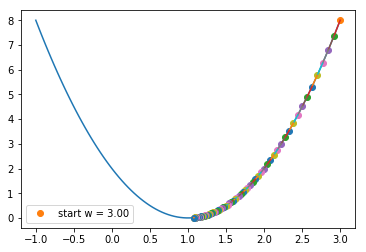

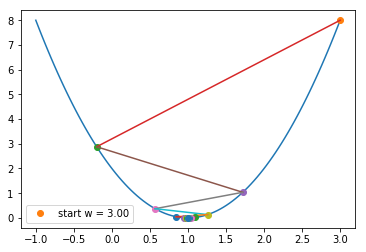

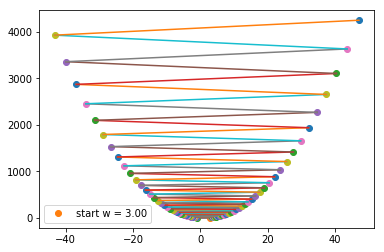

In [117]:
# w에 대해 편미분
# alpha = 0.01 / 0.4 / 0.51 인 경우 --- p.28~30

import numpy as np
import matplotlib.pyplot as plt
'''
1) y_hat이랑 J(w,b) 연립
y_hat = wx + b
f(x) = J(w,b) = 1/2(y_hat - y)^2

f(x) = 1/2((wx + b) - y)^2

2) x=2, y=2 대입, b=0고정
J = f(w) = 0.5(2w + 0 - 2)**2 # 변수 w밖에 없음->f(w)

3) w에 대해서 미분함 초기값 0,0으로 시작한다는데 그래서 b가 0인 것 같기도 함
'''
def f(w):
    f = 0.5 * (2*w - 2)**2 # x=2, y=2
    return f

def Df(w): # f(w)를 미분
    df = 2 * (w*2 - 2)
    return df


'''
w = w-기울기
      기울기 = alpha X (y_hat - y)x
               learning rate X 미분값
'''    
def xp1(w, alpha): # w값
    xp1 = w - alpha * Df(w)
    return xp1

'''
w=guess 가 뭘까?
wold에 w를 왜 또 넣어줘야 할까?
'''    
def plot_steps(guess, alpha, nsteps):
    fig,ax = plt.subplots()
    w = np.linspace(-1, 3, 100) # x축?
    ax.plot(w, f(w))# x축 w, y축 f(w) ?
    w = guess
    ax.plot(w, f(w), 'o', label='start w = %.2f' % w)
    for i in range(nsteps):
        wold = w
        w = xp1(w,alpha)
        ax.plot(w, f(w), 'o')
        ax.plot([wold, w], [f(wold), f(w)], '-')
    
    plt.legend()
    plt.show()
    
plot_steps(3, 0.01, 80) 
plot_steps(3, 0.4, 80)
plot_steps(3, 0.51, 80)

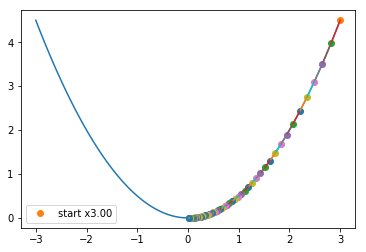

In [23]:
# b에 대해 편미분
# alpha = 0.03 인 경우 --- p.32

import numpy as np
import matplotlib.pyplot as plt

'''
f(x) = 1/2((wx + b) - y)^2

2) x=2, y=2 대입, 
f(x) = 0.5(2w + b - 2)**2

3) w=1고정
J = f(x) = 0.5(2*1 + b - 2)**2 = 0.5*b **2
'''
def f(x): # 함수
    f = 0.5*x**2
    return f

def Df(x): # f(x)의 미분함수
    df = x
    return df

def xp1(x,alpha):
    xp1 = x - alpha * Df(x)
    return xp1

def plot_steps(guess, alpha, nsteps):
    fig, ax = plt.subplots()
    x = np.linspace(-3, 3, 100)
    ax.plot(x, f(x))
    x = guess
    ax.plot(x, f(x), 'o', label='start x%.2f' % x)
    for i in range(nsteps):
        xold = x
        x = xp1(x, alpha)
        ax.plot(x, f(x), 'o')
        ax.plot([xold,x],[f(xold),f(x)], '-')
        
    plt.legend()
    plt.show()
    
plot_steps(3, 0.03, 80)

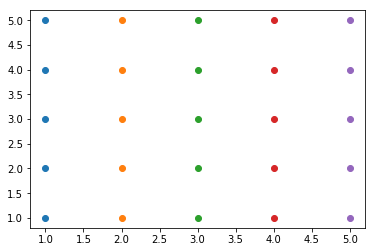

In [24]:
import matplotlib.pyplot as plt
import numpy as np

a0 = np.linspace(1,5,5)
a1 = np.linspace(1,5,5)
aa0, aa1 = np.meshgrid(a0,a1)
plt.plot(aa0, aa1, 'o')
plt.show()

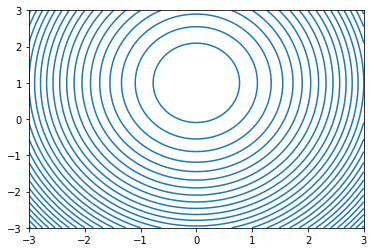

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def J(a0, a1, x, y, m):
    ret = 0
    for i in range(m):
        ret += 0.5*((a0 + a1*x[i]) - y[i]) **2
    return ret/m

x = np.linspace(-1, 1, 5)
y = x
a0 = np.linspace(-3,3,100)
a1 = np.linspace(-3,3,100)
aa0, aa1 = np.meshgrid(a0,a1)
plt.contour(aa0, aa1, J(aa0, aa1, x, y, m = len(x)), colors='C0', levels=
            [i for i in np.arange(0,80,0.3)])

plt.show()

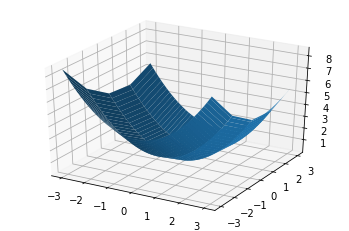

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')

def J(a0, a1, x, y, m):
    ret = 0
    for i in range(m):
        ret += 0.5*((a0 + a1 * x[i]) -y[i])**2
    return ret / m
x = np.linspace(-1, 1, 5)
y = x
a0 = np.linspace(-3,3,100)
a1 = np.linspace(-3,3,100)

aa0, aa1 = np.meshgrid(a0,a1)
ax.plot_surface(aa0, aa1, J(aa0, aa1, x, y, m = len(x)))
plt.show()`

### 2.3 역전파 구현 --- p.34

In [2]:
from IPython.core.display import display, HTML
display(HTML('<style>div.container {width:100% !important; }</style>'))

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<function matplotlib.pyplot.show(*args, **kw)>

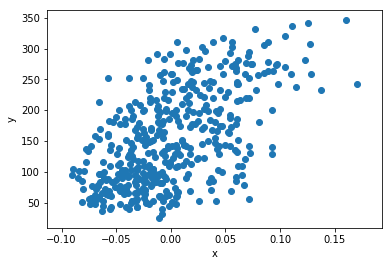

In [119]:
# Data Set 이용 --- p.36
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt

#print(diabetes.DESCR)
print(diabetes.feature_names)
x = diabetes.data[:,2]
y = diabetes.target

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show

In [55]:
print(diabetes.keys())
print('-'*100)
print('diabetes.feature_names :{}'.format(diabetes.feature_names))
print('-'*100)
print(diabetes.DESCR)
# print('diabetes.data :\n{}'.format(diabetes.data))
#print('diabetes.target :\n{}'.format(diabetes.target))
# print('diabetes.data_filename :{}'.format(diabetes.data_filename))
# print('diabetes.target_filename :{}'.format(diabetes.target_filename))

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
----------------------------------------------------------------------------------------------------
diabetes.feature_names :['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
----------------------------------------------------------------------------------------------------
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body

In [4]:
print('x.shape :{}'.format(x.shape))
print('y.shape :{}'.format(y.shape))

x.shape :(442,)
y.shape :(442,)


In [120]:
#import numpy as np
import pandas as pd
# x.columns()
# print(diabetes.DESCR)
print(diabetes)

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]]), 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
  

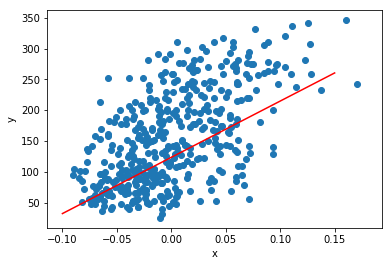

In [121]:
# 역전파 구현1(batch=1, epoch=1) --- p. 37
'''
역전파 구현
1. batch=1
2. 점의 전체 개수만큼 1번 순회 (epoch=1)
: SGD=>원소 하나마다 w,b 갱신
'''
'''
# @J/@w = (y_hat - y)x
# @J/@b = (y_hat - y)
# w = w - lr*(y_hat - y)x
# b = b - (y_hat - y)
'''
w = 1.0
b = 1.0

for i in range(1,500):
    for x_i, y_i in zip(x,y):
        y_hat = x_i * w + b
        err = y_hat - y_i     # (y_hat - y)
        w_rate = x_i          # lr를 x_i로 임의설정
        w = w - x_i * err     # w - lr*(y_hat - y)x
        b = b - err

plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)    # 산점도의 수많은 점 중에 하나
pt2 = (0.15, 0.15*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

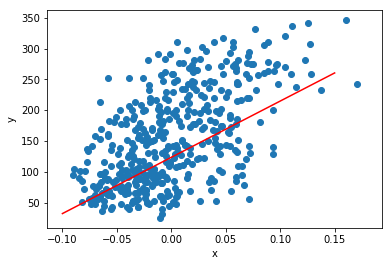

In [122]:
# 역전파 구현2(batch=1, epoch=100) --- p. 38
'''
역전파 구현
1. batch=1
2. epoch=100번 만큼 외부 루프에서 순회
3. 점의 전체 개수만큼 1번 순회
: SGD=>원소 하나마다 w,b 갱신
'''

for i in range(1,100):
    for x_i, y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err
        
plt.scatter(x,y)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.15, 0.15 * w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

y_pred :287.8416643899983
(x,y) : ( 0.18 , 287.8416643899983 )
pt1 :(-0.1, 32.03441018831299)
pt2 :(0.19, 296.97763775434424)


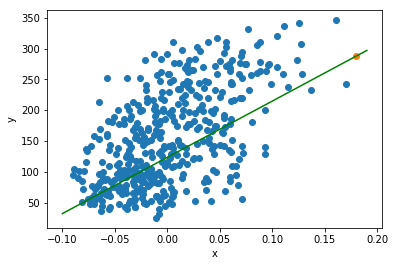

In [123]:
# 값 예측하기
x_new = 0.18
y_pred = x_new * w + b
print('y_pred :{}'.format(y_pred))
print('(x,y) : (', x_new,',', y_pred, ')')

plt.scatter(x,y)
plt.scatter(x_new, y_pred)
pt1 = (-0.1, -0.1 * w + b)
pt2 = (0.19, 0.19 * w + b)

print('pt1 :{}'.format(pt1))
print('pt2 :{}'.format(pt2))

plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### 2.4 선형회귀 구현 --- p. 39

<function matplotlib.pyplot.show(*args, **kw)>

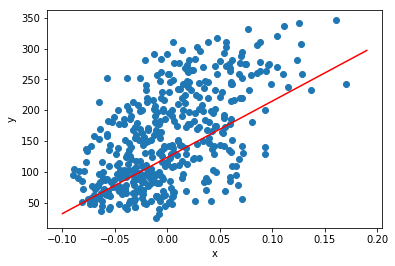

In [126]:
# Neuron class 만들기

import numpy as np
class Neuron:
    # 1. __init__() 함수 만들기
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
    
    # 2. 정방향 계산 만들기
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    # 3. 역방향 계산 만들기
    def backprop(self, x, err):
        w_grad = x * err         # 84 L이 뭐지..? 뭘 미분해서 나온 값이지??
        b_grad = 1 * err
        return w_grad, b_grad
    
    # 4. 훈련을 위한 fit() 함수 구현
    def fit(self, x,y, epochs=100, rate=0.01):
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                err = y_hat - y_i
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= rate*w_grad
                self.b -= b_grad

# 5. 모델 훈련하기
neuron = Neuron()
neuron.fit(x, y)

# 6. 학습이 완료된 모델의 가중치와 절편 확인
plt.scatter(x,y)
pt1 = (-0.1, -0.1*w + b)    # 산점도의 수많은 점 중에 하나
pt2 = (0.19, 0.19*w + b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.show

### 2.5 시그모이드 함수 --- p.45
<Logistic Regression 로지스틱회귀>
- 로지스틱 회귀 란?
- ▪ Classification(분류)
- ▪ Logistic vs Linear
    
- 동작 방식
- ▪ 가설 표현
- ▪ Sigmoid 함수
- ▪ Decision Boundary(결정경계)
- ▪ Cost Function
- ▪ Optimizer (Gradient Descent)


<Classification 분류>
- Binary Classification(이진 분류) 란?
    : 값은 0 또는 1
- Exam : Pass or Fail
- Spam : Not Spam or Spam
- Face : Real or Fake
- Tumor : Not Malignant or Malignant

Logistic vs Linear 로지스틱 회귀와 선형 회귀의 차이점?
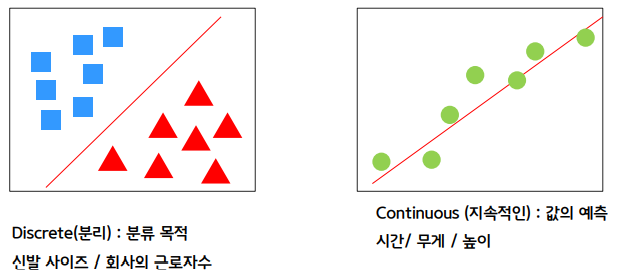

Epoch 1/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6467 - accuracy: 0.5000
Epoch 2/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6188 - accuracy: 0.5000
Epoch 3/200
8/8 [==============================] - 0s 998us/step - loss: 0.6109 - accuracy: 0.5000
Epoch 4/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6052 - accuracy: 0.5000
Epoch 5/200
8/8 [==============================] - 0s 1ms/step - loss: 0.6002 - accuracy: 0.5000
Epoch 6/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5956 - accuracy: 0.5000
Epoch 7/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5912 - accuracy: 0.5000
Epoch 8/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.5000
Epoch 9/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5828 - accuracy: 0.6250
Epoch 10/200
8/8 [==============================] - 0s 1ms/step - loss: 0.5786 - accuracy: 0.6250
Epoch 11/200
8/8 [=========

8/8 [==============================] - 0s 1ms/step - loss: 0.2501 - accuracy: 1.0000
Epoch 167/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 1.0000
Epoch 168/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2483 - accuracy: 1.0000
Epoch 169/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2475 - accuracy: 1.0000
Epoch 170/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2467 - accuracy: 1.0000
Epoch 171/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2458 - accuracy: 1.0000
Epoch 172/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2450 - accuracy: 1.0000
Epoch 173/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 1.0000
Epoch 174/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2434 - accuracy: 1.0000
Epoch 175/200
8/8 [==============================] - 0s 1ms/step - loss: 0.2426 - accuracy: 1.0000
Epoch 176/200
8/8 [=====

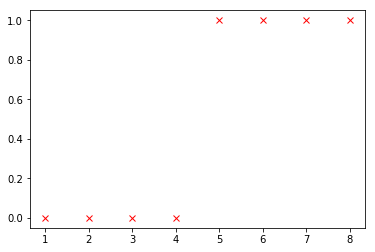

In [10]:
# keras로 구현한 이진 분류 문제 --- p.49

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1,2,3,4,5,6,7,8])
Y = np.array([0,0,0,0,1,1,1,1])

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))
RMSprop = optimizers.RMSprop(lr=0.01)
model.compile(optimizer = RMSprop, loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X,Y, batch_size=1, epochs=200, shuffle=False)
plt.plot(X,Y,'rx')
print(X)
print(model.predict(X))
plt.show()

1 : 악성종양
2 : 악성종양
3 : 악성종양
4 : 악성종양
5 : 양성종양
6 : 양성종양
7 : 양성종양
8 : 양성종양


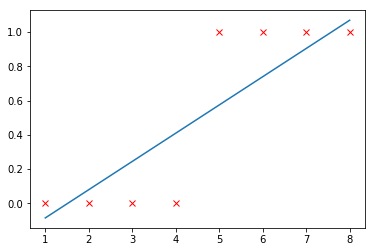

In [10]:
# Sigmoid 함수 사용 이유 --- p.51

import matplotlib.pyplot as plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        return z
    
    def fit(self, x,y, epochs=200, rate=0.01):
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                y_hat = self.activation(y_hat)
                err = y_i - y_hat
                w_grad, b_grad = self.backprop(x_i, err)
                self.w += rate * w_grad
                self.b += rate * b_grad
        
    
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([0,0,0,0,1,1,1,1])

neuron = Neuron()
neuron.fit(x,y)

for xi,yi in zip(x,y):
    plt.plot(xi, yi, 'rx')
    
y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if(y_hat <= 0.5):
        print('%d : 악성종양' % x_i)
    else:
        print('%d : 양성종양' % x_i)
    y_temp.append(y_hat)
    

plt.plot(x,y_temp)    
plt.show()

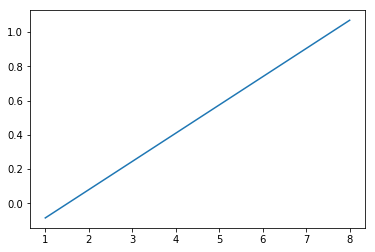

In [11]:
plt.plot(x,y_temp)    
plt.show()

OR(odds ratio) = 𝑝/1−𝑝 (p=성공확률)


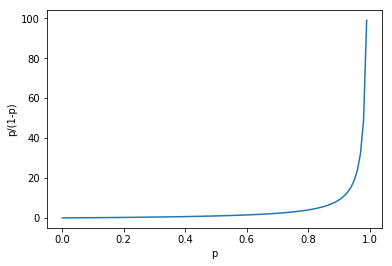

p가 0부터 1까지 증가할 때 오즈 비의 값은 처음에는 천천히 증가하지만 p가 1에 가까워지면 급격히 증가한다


In [20]:
# 오즈 비(odds ratio) --- p.55

print('OR(odds ratio) = 𝑝/1−𝑝 (p=성공확률)')

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
probs = np.arange(0, 1, 0.01)
odds = [p / (1-p) for p in probs]
plt.plot(probs, odds)
plt.xlabel('p')
plt.ylabel('p/(1-p)')
plt.show()
print('p가 0부터 1까지 증가할 때 오즈 비의 값은 처음에는 천천히 증가하지만 p가 1에 가까워지면 급격히 증가한다')

logit(p) = log( 𝑝/1−𝑝 ) (p=성공확률)


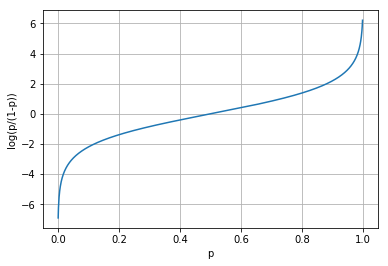

로짓 함수는 p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징을 가진다.


In [19]:
# 로짓 함수( Logit function) --- p.56

print('logit(p) = log( 𝑝/1−𝑝 ) (p=성공확률)') # odds 비에 로그함수 취한 로짓함수

probs = np.arange(0.001, 0.999, 0.001)
logit = [np.log(p/(1-p)) for p in probs]
plt.plot(probs, logit)
plt.xlabel('p')
plt.ylabel('log(p/(1-p))')
plt.grid()
plt.show()
print('로짓 함수는 p가 0.5일 때 0이 되고 p가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징을 가진다.')

시그모이드 함수는 로지스틱함수( logit(p) = log( 𝑝/1−𝑝 ) = z )를 유도해 p에 대해 정리한 것임


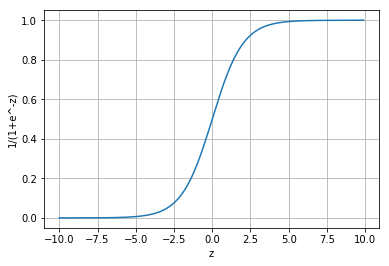

In [129]:
# 시그모이드 함수( Sigmoid function) --- p.57

'''
logit = log(p/(1-p)) = z 
e^log(p/1-p) = e^z
p/(1-p) = e^z
p = e^z * (1-p) = e^z - e^z * p
                  e^z = p(1+e^z)
                        p = e^z / 1+e^z = 1 / ((1/e^z) +1) = 1 / 1+e^-z

'''

print('시그모이드 함수는 로지스틱함수( logit(p) = log( 𝑝/1−𝑝 ) = z )를 유도해 p에 대해 정리한 것임')

zs = np.arange(-10, 10, 0.1)
gs = [1 / (1 + np.exp(-z)) for z in zs] # 시그모이드 값들 저장
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.grid()
plt.show()

#### Cost Function --- p.58
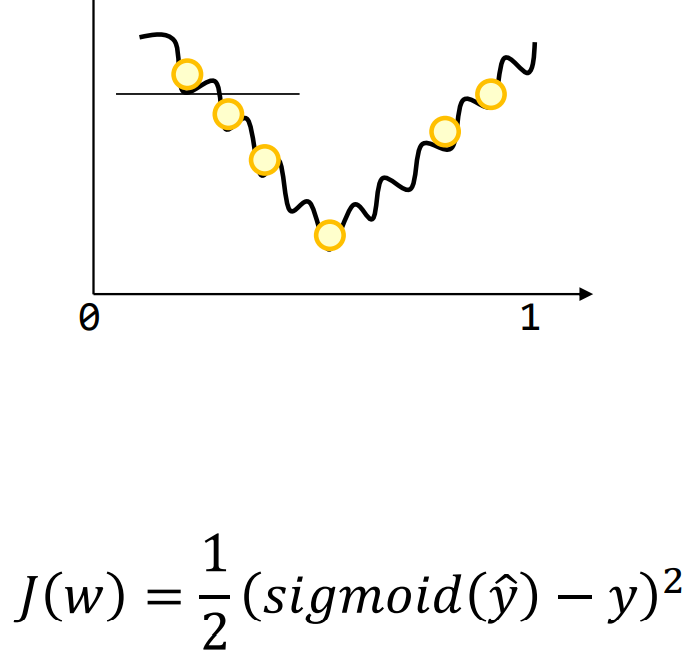
로지스틱 회귀에서는 MSE를 사용할 수 없음.
이유 : 지역 최솟값 생성 때문임.



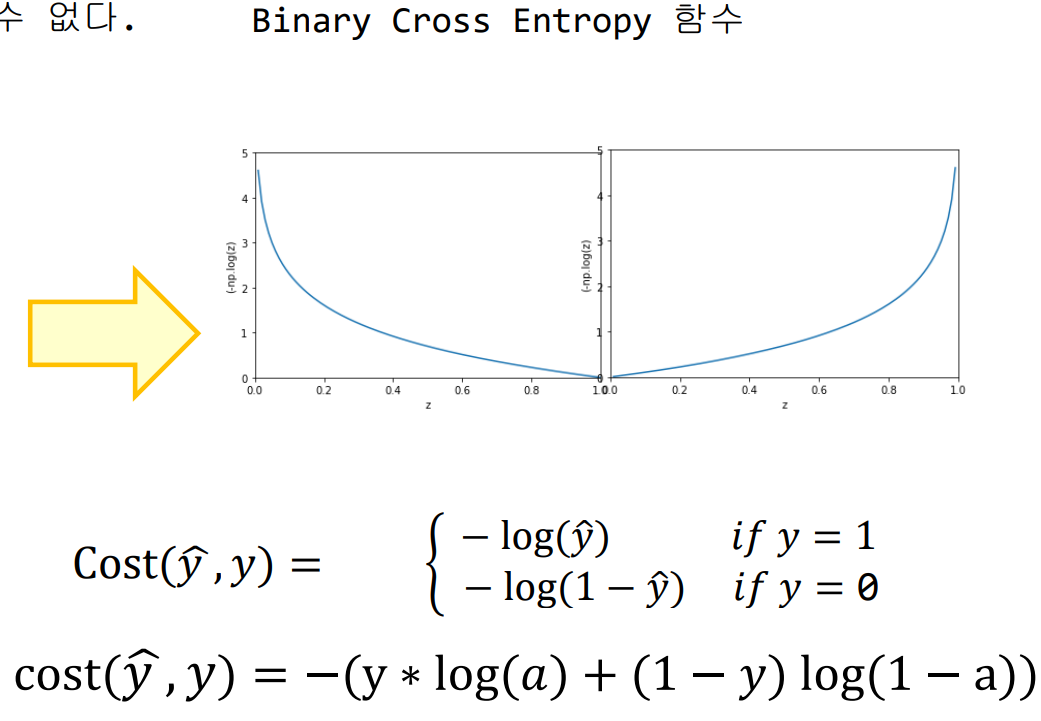
그래서 로지스틱 회귀의 비용함수는 위와 같음.

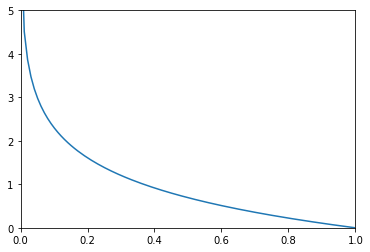

In [23]:
# 로지스틱 회귀 손실 함수 --- p.59

print('Cost = 0 if y = 1, 𝑦_hat = 1 But as 𝑦_hat→ 0 Cost → ∞')
zs = np.arange(0.001, 10., 0.01)
gs = [-np.log(z) for z in zs]
plt.plot(zs,gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.show()

Cost = 0 if y = 0, 𝑦_hat = 0 But as 𝑦_hat→ 1 Cost → ∞


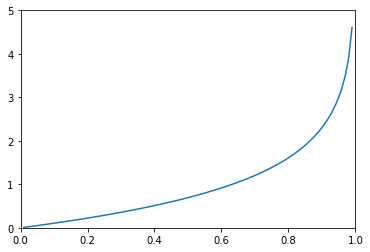

In [24]:
# 로지스틱 회귀 손실 함수 --- p.60

print('Cost = 0 if y = 0, 𝑦_hat = 0 But as 𝑦_hat→ 1 Cost → ∞')

zs = np.arange(0.01, 1, 0.01)
gs = [-np.log(1-z) for z in zs]
plt.plot(zs, gs)
plt.xlim(0,1)
plt.ylim(0,5)
plt.show()

In [ ]:
# 로지스틱 회귀 손실 함수 --- p.67

import matplotlib.pyplot as plt
import numpy as np

class Neuron:
    
    def __init__(self):
        self.w = 1.0
        self.b = 1.0
        
    def forpass(self, x):
        y_hat = x * self.w + self.b
        return y_hat
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def activation(self, z):
        return z
    
    def fit(self, x,y, epochs=200, rate=0.01):
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                y_hat = self.forpass(x_i)
                y_hat = self.activation(y_hat)
                err = y_i - y_hat
                w_grad, b_grad = self.backprop(x_i, err)
                self.w += rate * w_grad
                self.b += rate * b_grad
        
    
x = np.array([1,2,3,4,5,6,7,8])
y = np.array([0,0,0,0,1,1,1,1])

neuron = Neuron()
neuron.fit(x,y)

for xi,yi in zip(x,y):
    plt.plot(xi, yi, 'rx')
    
y_temp = []
for x_i in x:
    y_hat = neuron.forpass(x_i)
    if(y_hat <= 0.5):
        print('%d : 악성종양' % x_i)
    else:
        print('%d : 양성종양' % x_i)
    y_temp.append(y_hat)
    

plt.plot(x,y_temp)    
plt.show()

### 2.6 로지스틱 회귀 구현 --- p.70

In [25]:
# 분류용 데이터셋을 준비(위스콘신 유방암 데이터 세트)

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.data.shape, cancer.target.shape)

(569, 30) (569,)


In [30]:
print(cancer.data[:3])
print('cancer에는 569개의 샘플과 30개의 특성이 있다.')

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]]
cancer에는 569개의 샘플과 30개의 특성이 있다.


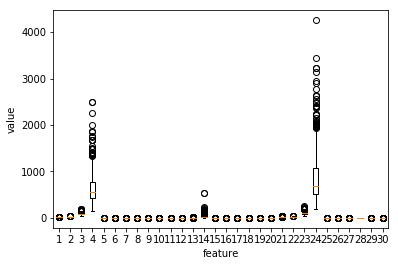

In [31]:
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [32]:
cancer.feature_names[[3,23]]

array(['mean area', 'worst area'], dtype='<U23')

In [33]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [34]:
x = cancer.data
y = cancer.target

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,
                                                   test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [ ]:
class LogisticNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    def forpass(self, x):
        z = x * self.w + self.b
        return zp
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    def activation(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    def fit(self, x,y, epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x,y):
                z = self.forpass(x_i)
                a = self.actvation(z)
                err = (a - y_i)
                w_grand, b_grad = self.backprop(x_i, err)
                self.w -=  w_grad
                self.b -= b_grad
                
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a >= 0.5
    

In [44]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

NameError: name 'LogisticNeuron' is not defined

In [45]:
np.mean(neuron.predict(x_test)==t_test)

AttributeError: 'Neuron' object has no attribute 'predict'

# 구현으로 배우는 딥러닝 이해_3.pdf

## 3. 신경망 시작하기
- 3.1 단일층 신경망 구현
- 3.2 검증 세트 분리와 스케일링
- 3.3 과대적합과 과소적합
- 3.4 규제방법 구현
- 3.5 교차 검증 구현

### 3.1 단일층 신경망 구현 --- p.2

In [ ]:
from IPython.core.display import display, HTML
display(HTML('<style>div.container {width:100% important; }</style>'))

In [10]:
import numpy as np
x = np.array([10,11,12,13,14,15,16,17,18,19])
print(len(x))
print(x)
np.arange(len(x))
indexes = np.random.permutation(np.arange(len(x))) # permutation 섞는거?
print(indexs)
for i in indexs:
    print(x[i], end=' ')

10
[10 11 12 13 14 15 16 17 18 19]
[4 1 9 3 8 0 2 5 6 7]
14 11 19 13 18 10 12 15 16 17 

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   stratify=y, test_size=0.2, random_state=42)

In [12]:
class SingleLayer:
    
    def __init__(self):
        self.w = None
        self.b = None
        self.losses = []
    
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def activation(self, z):
        z = np.clip(z,-100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x,y,epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexs = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad, b_grad = self.backprop(x[i],err)
                self.w -= w_grad
                self.b -= b_grad
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1 - y[i]) * np.log(1-a))
            self.losses.append(loss/len(y))
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y)
        

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

0.8070175438596491

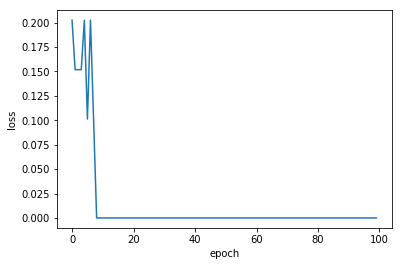

In [14]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 구현으로 배우는 딥러닝 이해_4.pdf

## 3. 신경망 시작하기

### 3.2 검증 세트 분리와 스케일링

In [16]:
# 검증 세트 분리 --- p.2

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,
                                                           stratify=y, test_size=0.2, random_state=42)

print(x.shape)
print(len(x_train_all), len(x_test))

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                 stratify=y_train_all,
                                                 test_size=0.2, random_state=42)
print(len(x_train), len(x_val))

(569, 30)
455 114
364 91


['mean perimeter' 'mean area']


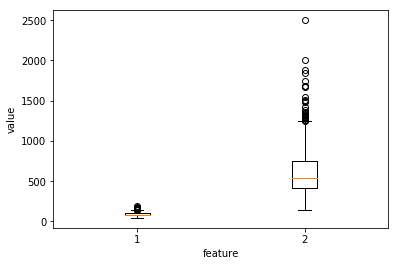

In [17]:
# 스케일링 --- p.4
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:,2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()
print('')

In [44]:
class SingleLayer:
    
    def __init__(self, learning_rate = 0.01): ##   
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []      ##
        self.lr = learning_rate  ##
                
        
    def forpass(self,x):
        z = np.sum(x * self.w)+ self.b
        return z
    
    def activation(self,z):
        z = np.clip(z,-100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    def fit(self,x,y,epochs=100):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad,b_grad = self.backprop(x[i],err)
                self.w -= self.lr * w_grad            ##
                self.b -= b_grad
                self.w_history.append(self.w.copy())  ##
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
           
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y)

In [45]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

0.8021978021978022

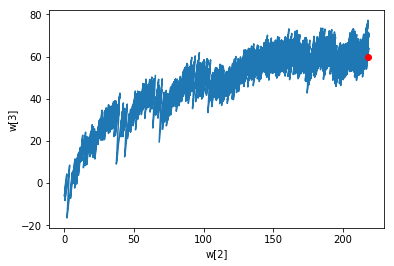

In [46]:
w2 = []
w3 = []
for w in layer1.w_history:
    w2.append(w[2])
    w3.append(w[3])
    
plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

In [47]:
train_mean = np.mean(x_train, axis=0)
train_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - train_mean) / train_std

In [48]:
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)

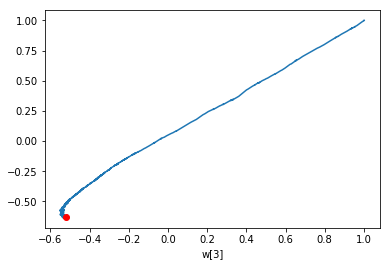

In [49]:
w2 = []
w3 = []
for w in layer2.w_history:
    w2.append(w[2])
    w3.append(w[3])
    
plt.plot(w2,w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.xlabel('w[3]')
plt.show()

In [50]:
layer2.score(x_val, y_val)

0.37362637362637363

In [51]:
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.978021978021978

In [52]:
x_val.shape

(91, 30)

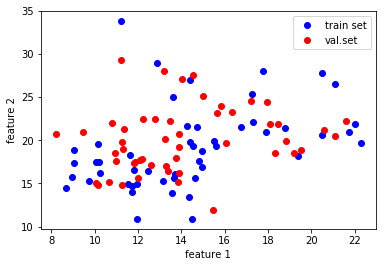

In [53]:
plt.plot(x_train[:50,0], x_train[:50,1], 'bo')
plt.plot(x_val[:50,0], x_val[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['train set', 'val.set'])

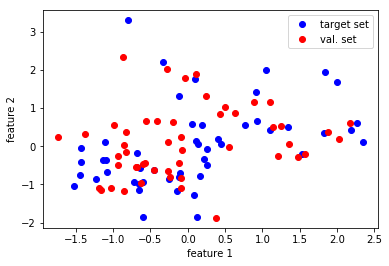

In [54]:
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['target set', 'val. set'])

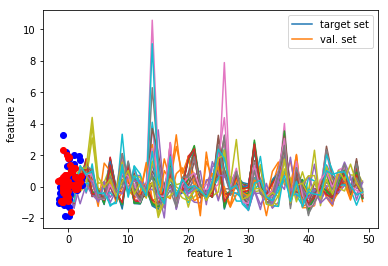

In [43]:
x_val_scaled = (x_val - train_mean) / train_std
plt.plot(x_train_scaled[:50])
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(['target set', 'val. set'])

In [55]:
layer2.score(x_val_scaled, y_val)

0.978021978021978

### 3.3 과대적합과 과소적합 --- p.13

In [59]:
class SingleLayer:
    
    def __init__(self, learning_rate = 0.01):
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []        
        self.lr = learning_rate    
        self.val_losses = []
        
    def forpass(self,x):
        z = np.sum(x * self.w)+ self.b
        return z
    
    def activation(self,z):
        z = np.clip(z,-100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad,b_grad = self.backprop(x[i],err)
                self.w -= self.lr * w_grad      ##
                self.b -= b_grad
                self.w_history.append(self.w.copy())  ##
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y))
            self.update_val_loss(x_val,y_val)
    def update_val_loss(self,x_val,y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a,1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
            
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y)

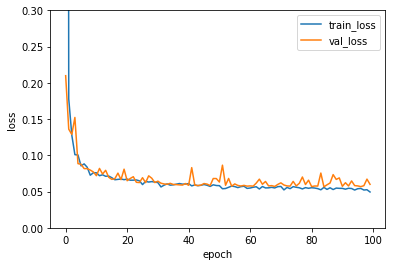

In [61]:
layer3 = SingleLayer()
layer3.fit(x_train_scaled, y_train, x_val = x_val_scaled, y_val = y_val)
plt.ylim(0,0.3)
plt.plot(layer3.losses)
plt.plot(layer3.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [65]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train)
layer4.score(x_val_scaled, y_val)

0.978021978021978

In [66]:
layer4 = SingleLayer()
layer4.fit(x_train_scaled, y_train, epochs=40)
layer4.score(x_val_scaled, y_val)

0.978021978021978

In [67]:
print('그 위에 그림을 보면 에포크 40번이나 100번이나 비슷해보여서 각각 수치를 넣어보니 스코어가 비슷함')

그 위에 그림을 보면 에포크 40번이나 100번이나 비슷해보여서 각각 수치를 넣어보니 스코어가 비슷함


### 3.4 규제방법 구현 --- p.16

In [70]:
# L1 규제 적용하기

class SingleLayer:
    
    def __init__(self, learning_rate = 0.01, l1=0):  ##
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []        
        self.lr = learning_rate    
        self.val_losses = []
        self.l1 = l1
        
    def forpass(self,x):
        z = np.sum(x * self.w)+ self.b
        return z
    
    def activation(self,z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self,x,y,epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad,b_grad = self.backprop(x[i],err)
                w_grad += self.l1 * np.sign(self.w)   ##
                w_grad -= self.lr * w_grad            ##
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y) + self.reg_loss())  ##
            self.update_val_loss(x_val, y_val)            
            
    def reg_loss(self):  ##
        return self.l1 * np.sum(np.abs(self.w))  ##
                        
    def update_val_loss(self,x_val,y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a,1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
            
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y)

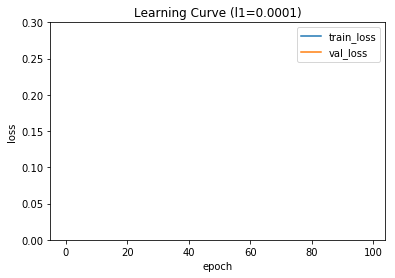

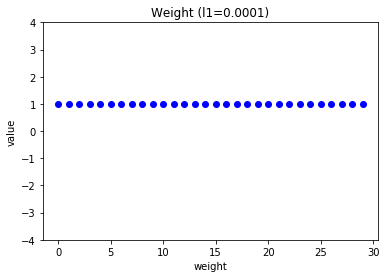

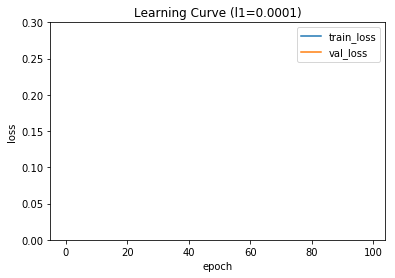

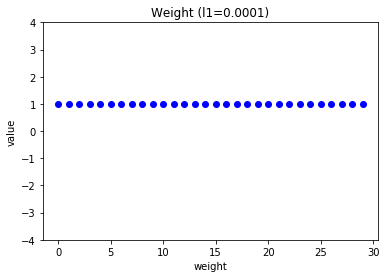

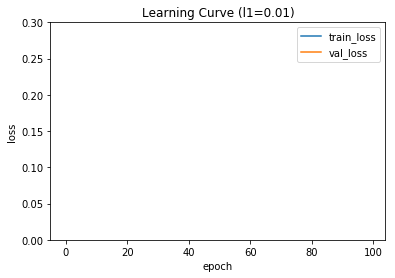

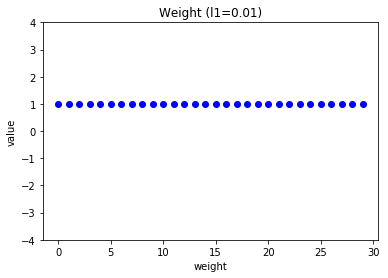

In [71]:
l1_list = [0.0001, 0.0001, 0.01]

for l1 in l1_list:
    lyr = SingleLayer(l1=l1)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l1={})'.format(l1))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l1={})'.format(l1))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4,4)
    plt.show()

In [74]:
# L2 규제 적용하기

class SingleLayer:
    
    def __init__(self, learning_rate = 0.01, l1=0, l2=0):  ##
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []        
        self.lr = learning_rate    
        self.val_losses = []
        self.l1 = l1
        self.l2 = l2
        
    def forpass(self,x):
        z = np.sum(x * self.w)+ self.b
        return z
    
    def activation(self,z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self,x,y,epochs=100, x_val=None, y_val=None):
        self.w = np.ones(x.shape[1])
        self.b = 0
        for i in range(epochs):
            loss = 0
            indexes = np.random.permutation(np.arange(len(x)))
            for i in indexes:
                z = self.forpass(x[i])
                a = self.activation(z)
                err = a - y[i]
                w_grad,b_grad = self.backprop(x[i],err)
                w_grad += self.l1 * np.sign(self.w)   ##
                w_grad -= self.lr * w_grad            ##
                self.b -= b_grad
                self.w_history.append(self.w.copy())
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += -(y[i]*np.log(a) + (1-y[i])*np.log(1-a))
            self.losses.append(loss/len(y) + self.reg_loss())  ##
            self.update_val_loss(x_val, y_val)            
            
    def reg_loss(self):  ##
        return self.l1 * np.sum(np.abs(self.w) + \
                               self.l2 / 2 * np.sum(self.w**2))  ##
                        
    def update_val_loss(self,x_val,y_val):
        if x_val is None:
            return
        val_loss = 0
        for i in range(len(x_val)):
            z = self.forpass(x_val[i])
            a = self.activation(z)
            a = np.clip(a,1e-10, 1-1e-10)
            val_loss += -(y_val[i]*np.log(a) + (1-y_val[i])*np.log(1-a))
        self.val_losses.append(val_loss/len(y_val))
            
    def predict(self,x):
        z = [self.forpass(x_i) for x_i in x]
        return np.array(z) > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y)

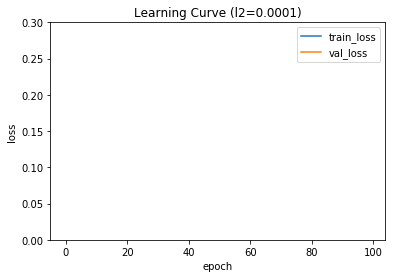

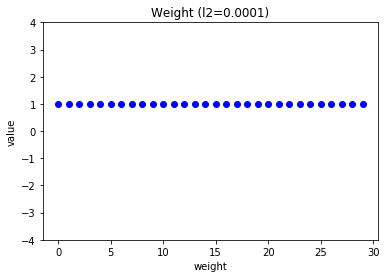

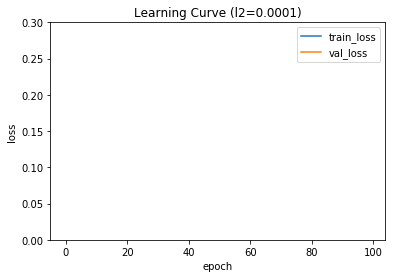

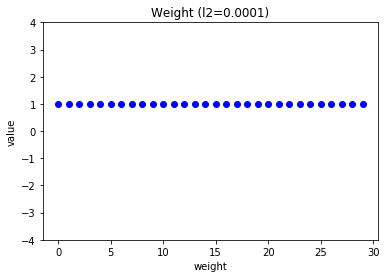

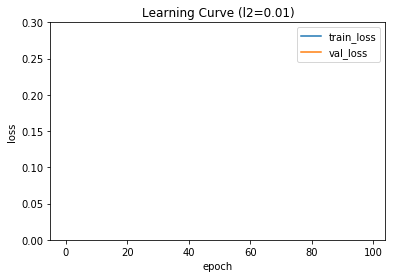

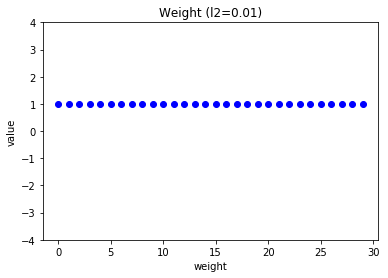

In [76]:
l2_list = [0.0001, 0.0001, 0.01]

for l2 in l2_list:
    lyr = SingleLayer(l2=l2)
    lyr.fit(x_train_scaled, y_train, x_val=x_val_scaled, y_val=y_val)
    
    plt.plot(lyr.losses)
    plt.plot(lyr.val_losses)
    plt.title('Learning Curve (l2={})'.format(l2))
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'val_loss'])
    plt.ylim(0, 0.3)
    plt.show()
    
    plt.plot(lyr.w, 'bo')
    plt.title('Weight (l2={})'.format(l2))
    plt.ylabel('value')
    plt.xlabel('weight')
    plt.ylim(-4,4)
    plt.show()

### 3.5 교차 검증 구현 --- p.30

In [78]:
validation_scores = []
k = 10
bins = len(x_train_all) // k

for i in range(k):
    start = i*bins
    end = (i+1)*bins
    val_fold = x_train_all[start:end]
    val_target = y_train_all[start:end]
    
    train_index = list(range(0, start))+list(range(end, len(x_train)))
    train_fold = x_train_all[train_index]
    train_target = y_train_all[train_index]
    train_mean = np.mean(train_fold, axis=0)
    train_std = np.std(train_fold, axis=0)
    train_fold_scaled = (train_fold - train_mean) / train_std
    val_fold_scaled = (val_fold - train_mean) / train_std
    
    lyr = SingleLayer(l2=0.01)
    lyr.fit(train_fold_scaled, train_target, epochs=50)
    score = lyr.score(val_fold_scaled, val_target)
    validation_scores.append(score)
print(np.mean(validation_scores))

0.29333333333333333


# 구현으로 배우는 딥러닝 이해_5.pdf

## 4. 다층 신경망 이해
4.1 행렬 곱 연산
4.2 배치경사 하강법 구현
4.3 2개의 층을 가진 신경망 구현
4.4 다층 신경망의 경사 하강법 구현
4.5 미니배치 경사 하강법 구현
4.6 다중분류 다층 신경망을 이해한다.
4.7 케라스를 이용한 다층신경망의 다양한 구현

### 4.1 행렬 곱 연산 --- p.2

In [4]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,5,6])
print(a*b)
c = np.dot(a,b)
print(c)

[ 4 10 18]
32


In [8]:
a = np.array([[1,2,3],
              [4,5,6]])
b = np.array([4,5,6])

#c = np.dot(b,a)
print(c.shape)
print(c)

d = np.dot(a,b)
print(d.shape)
print(d)

(2,)
[32 77]
(2,)
[32 77]


In [20]:
a = np.array([[1,2,3]])
print('len(a) :{}'.format(len(a)))
print('a.shape :{}'.format(a.shape))

b = np.array([[2],[2],[2]])
print('len(b) :{}'.format(len(b)))
print('b.shape :{}'.format(b.shape))

c = np.dot(a,b)
print('c.ndim : {}'.format(c.ndim))

c = np.dot(b,a)
print('c.ndim : {}'.format(c.ndim))

len(a) :1
a.shape :(1, 3)
len(b) :3
b.shape :(3, 1)
c.ndim : 2
c.ndim : 2


In [23]:
a = np.array([[1,2,3],
              [4,5,6]])
print('a.shape :{}'.format(a.shape))
b = np.array([[1,2],
              [1,2],
              [1,2]])
print('b.shape :{}'.format(b.shape))

a.shape :(2, 3)
b.shape :(3, 2)


In [31]:
a = np.array([1,2,3,4,5])
print('a :{}'.format(a))
b = a
print('b :{}'.format(b))
print('-'*20)
b[0] = 10
print('a :{}'.format(a))
print('b :{}'.format(b))

a :[1 2 3 4 5]
b :[1 2 3 4 5]
--------------------
a :[10  2  3  4  5]
b :[10  2  3  4  5]


In [32]:
a = np.array([1,2,3,4,5])
b = a.copy()
print('b :{}'.format(b))

b :[1 2 3 4 5]


In [38]:
a = np.array([1,2,3])
print('a :{}'.format(a))
print('a.shape :{}'.format(a.shape))
print('-'*50)
print('a.T :{}'.format(a.T))
print('a.T.shape :{}'.format(a.T.shape))
print('-'*50)
b = np.reshape(a,(-1,1)) # -1은 값은 상관하지 않을테니, 열만 1로 만들어주어라
print('b :\n{}'.format(b))
print('b.shape :{}'.format(b.shape))

a :[1 2 3]
a.shape :(3,)
--------------------------------------------------
a.T :[1 2 3]
a.T.shape :(3,)
--------------------------------------------------
b :
[[1]
 [2]
 [3]]
b.shape :(3, 1)


In [42]:
a = np.array([[1,2,3],
              [1,2,3]])
print('a :\n{}'.format(a))
print('a.shape :{}'.format(a.shape))
print('-'*50)
print('a.T :\n{}'.format(a.T))
print('a.T.shape :{}'.format(a.T.shape))

a :
[[1 2 3]
 [1 2 3]]
a.shape :(2, 3)
--------------------------------------------------
a.T :
[[1 1]
 [2 2]
 [3 3]]
a.T.shape :(3, 2)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x,y,
                                                           stratify=y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all,
                                                 stratify=y_train_all, test_size=0.2, random_state=42)

In [5]:
print('x_train.shape :{}'.format(x_train.shape))
print('y_train.shape :{}'.format(y_train.shape))

x_train.shape :(364, 30)
y_train.shape :(364,)


In [6]:
a = x_train[:,1]
print('a :{}'.format(a))
a = np.reshape(a, (-1,1))
print('a.shape :{}'.format(a.shape))

a :[17.66 14.02 21.59 21.43 16.58 16.07 17.53 20.67 15.6  18.9  18.18 16.18
 17.53 24.98 15.34 15.76 26.99 21.02 33.81 19.77 27.81 21.9  10.89 28.92
 18.33 26.57 17.33 13.9  21.59 16.95 15.69 20.99 18.77 10.91 19.38 25.42
 19.67 19.59 28.03 13.47 14.45 14.96 19.34 16.41 14.69 21.72 19.97 15.34
 22.13 14.93 20.22 24.27 20.26 23.23 13.86 22.14 21.68 18.59 28.21 17.56
 19.07 13.29 11.28 18.6  16.67 14.23 31.12 27.61 18.49 19.22 19.83 14.92
 19.54 26.97 22.02 25.44 14.76 13.72 16.03 15.51 18.15 20.74 23.98 19.63
 22.33 16.21 20.52 18.61 16.17 24.91 17.31 12.44 22.11 15.1  16.74 21.25
 18.36 17.25 18.66 22.15 15.92 18.22 26.67 24.81 19.32 19.65 20.76 18.14
 18.03 18.83 17.08 21.6  15.51 15.7  18.75 20.11 17.93 22.76 15.15 17.46
 23.93 30.62 20.31 22.22 14.65 18.89 16.84 17.57 17.21 19.31 21.53 12.91
 29.81 18.9  18.61 21.56 22.53 12.22 21.82 20.38 16.32 18.54 14.74 16.95
 23.94 28.2  23.95 12.39 13.37 17.92 27.85 32.47 19.12 18.05 22.68 15.98
 13.21 16.4  18.7  16.82 21.41 28.25 14.98 19.02

In [7]:
a = np.reshape(a, (a.shape[0],))
err = a - y_train
print('a.shape :{}'.format(a.shape))
print('y_train.shape :{}'.format(y_train.shape))
err = np.reshape(err, (err.shape[0],1))
print('err.shape :{}'.format(err.shape))

a.shape :(364,)
y_train.shape :(364,)
err.shape :(364, 1)


In [8]:
class SingleLayer:
    def __init__(self, learning_rate = 0.01,l1=0,l2=0):  ##
        self.w = None
        self.b = None
        self.losses = []
        self.w_history = []        
        self.lr = learning_rate    
        self.val_losses = []
        self.l1=l1
        self.l2=l2
        
    def forpass(self,x):
        #z = np.sum(x * self.w)+ self.b
        z = np.dot(x, self.w) + self.b
        return z
    
    def activation(self,z):
        z = np.clip(z,-100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def backprop(self, x, err):
        #w_grad = x * err
        #b_grad = 1 * err
        #mse
        m = len(x)
        w_grad = np.dot(x.T, err) / m
        b_grad = np.sum(err) / m
        return w_grad, b_grad
    
    def fit(self,x,y,epochs=100,x_val=None, y_val=None):
        y = y.reshape(-1,1)
        y_val = y_val.reshape(-1,1)
        m = len(x)
        self.w = np.ones((x.shape[1],1))
        
        self.b = 0
        self.w_history.append(self.w.copy())
        np.random.seed(42)
        
        for i in range(epochs):
            #loss = 0
            #indexes = np.random.permutation(np.arange(len(x)))
            #for i in indexes:
                #z = self.forpass(x[i])
                z = self.forpass(x)
                a = self.activation(z)
                err = a - y
                #w_grad,b_grad = self.backprop(x[i],err)
                w_grad, b_grad = self.backprop(x, err)
                
                
                w_grad += (self.l1 * np.sign(self.w) + self.l2 * self.w) / m
                self.w -= self.lr * w_grad        
                self.b -= self.lr * b_grad
                
                self.w_history.append(self.w.copy())  
                a = np.clip(a, 1e-10, 1-1e-10)
                loss = np.sum(-(y*np.log(a) + (1-y)*np.log(1-a)))
                
                self.losses.append( (loss + self.reg_loss()) / m )  ##
                self.update_val_loss(x_val,y_val)
            
    def reg_loss(self):  
        return self.l1 * np.sum(np.abs(self.w)) + self.l2 / 2 * np.sum(self.w**2)     
    
    def update_val_loss(self,x_val,y_val):
#         if x_val is None:
#             return
#         val_loss = 0
#         for i in range(len(x_val)):
#             z = self.forpass(x_val[i])
            z = self.forpass(x_val)
            a = self.activation(z)
            a = np.clip(a,1e-10, 1-1e-10)
            val_loss = np.sum(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
            self.val_losses.append( (val_loss + self.reg_loss()) / len(y_val))
            
    def predict(self,x):
        #z = [self.forpass(x_i) for x_i in x]
        z = self.forpass(x)
        return z > 0
    
    def score(self,x,y):
        return np.mean(self.predict(x) == y.reshape(-1,1))

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)

In [101]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train,
                x_val=x_val_scaled, y_val=y_val, epochs=1000)
single_layer.score(x_val_scaled, y_val)

0.9560439560439561

In [102]:
single_layer = SingleLayer(l2=0.01)
single_layer.fit(x_train_scaled, y_train,
                x_val = x_val_scaled, y_val=y_val, epochs=1000)
single_layer.score(x_val)

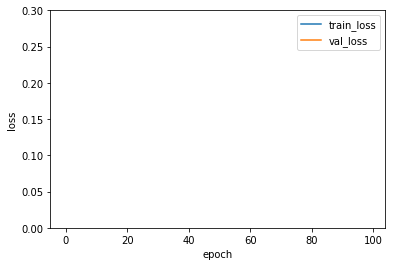

In [103]:
plt.ylim(0,0.3)
plt.plot(single_layer.losses)
plt.plot(single_layer.val_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

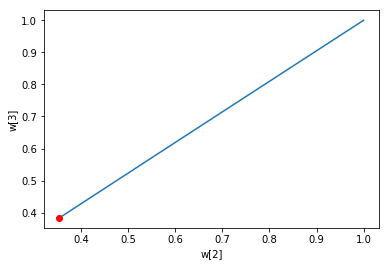

In [104]:
w2=[]
w3=[]
for w in single_layer.w_history:
    w2.append(w[2])
    w3.append(w[3])
plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

### 4.5 미니배치 경사 하강법 구현 --- p.37

In [12]:
class MinibatchNetwork(RandomInitNetwork):
    def __init__(self, units=10, batch_size=32, learning_rate=0.01, l1=0, l2=0):
        self.batch_size = batch_size
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
            y_val = y_val.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
            self.init_weights(x.shape[1]) # 은닉층과 출력층의 가중치를 초기화합니다.
            np.random.seed(42)
            # epochs만큼 반복합니다.
            for i in range(epochs):
                loss = 0
                # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
                for x_batch, y_batch in self.gen_batch(x, y):
                    y_batch = y_batch.reshape(-1, 1) # 타깃을 열 벡터로 바꿉니다.
                    m = len(x_batch) # 샘플 개수를 저장합니다.
                    a = self.training(x_batch, y_batch, m)
                    # 안전한 로그 계산을 위해 클리핑합니다.
                    a = np.clip(a, 1e-10, 1-1e-10)
                    # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                    loss += np.sum(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                self.losses.append((loss + self.reg_loss()) / len(x))
                # 검증 세트에 대한 손실을 계산합니다.
                self.update_val_loss(x_val, y_val)

                
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size: # 32로 나누어 떨어지지 않는 나머지가 있는가?
            bins += 1 # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end] # batch_size만큼 슬라이싱하여 반환합니다.

NameError: name 'RandomInitNetwork' is not defined

In [13]:
#minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)

In [14]:
minibatch_net = MinibatchNetwork(l2=0.01, batch_size=32)
minibatch_net.fit(x_train_scaled, y_train, 
x_val=x_val_scaled, y_val=y_val, epochs=500)
minibatch_net.score(x_val_scaled, y_val)


NameError: name 'MinibatchNetwork' is not defined

In [18]:
# 제너레이터
def foo():
    print('foo()')
    yield 10
    print('after')
    yield 20
    
def goo():
    print('goo()')
    
class ts():
    pass

c = foo() # 함수호출x, 제너레이터로 생성
print(c) # 제너레이터 오브젝트
n = next(c) # next로 객체의 주소값을 던져주면 출력
print(n)
n = next(c)
print(n)

<generator object foo at 0x000001AAF785DA20>
foo()
10
after
20


In [4]:
# 층화추출법

import seaborn as sns
iris = sns.load_dataset('iris')
x = iris.iloc[:,:-1]
y = iris.iloc[:, -1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [7]:
print(y_test.value_counts())
print(' -> 균등하게 뽑히지 않음')

versicolor    17
virginica     15
setosa        13
Name: species, dtype: int64
균등하게 뽑히지 않음


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,
                                                   stratify=y)
print(y_test.value_counts())
print(' -> 균등하게 뽑힘')

versicolor    15
virginica     15
setosa        15
Name: species, dtype: int64
 -> 균등하게 뽑힘


## 4. 다층 신경망 이해

### 4.6 다중분류 다층 신경망을 이해한다. --- p. 43

In [36]:
# 다중 분류 신경망

import numpy as np
temp = np.array([[2,20, 1.39, 0.85],
                 [0.00, -1.39, -2.20]])

exp_temp = np.exp(temp)
print(exp_temp)

ret = exp_temp / np.sum(exp_temp, axis=1).reshape(-1,1)
print(ret)

AttributeError: 'list' object has no attribute 'exp'

In [40]:
# 다중 분류 신경망 --- p.48~49?

import numpy as np
temp = np.array([[2.20,1.39,0.85],
                [0.00,-1.39,-2.20]])

exp_temp = np.exp(temp)
print(exp_temp)

ret = exp_temp / np.sum(exp_temp, axis=1).reshape(-1,1)
print(ret)

[[9.0250135  4.01485005 2.33964685]
 [1.         0.2490753  0.11080316]]
[[0.5868206  0.26105188 0.15212752]
 [0.73535983 0.18315997 0.08148019]]


In [31]:
x = np.array([0.00001, 1, 2, 4, 10, 100])
print(np.exp(x))

[1.00001000e+00 2.71828183e+00 7.38905610e+00 5.45981500e+01
 2.20264658e+04 2.68811714e+43]


In [41]:
np.sum(exp_temp, axis=1)

array([15.3795104 ,  1.35987846])

In [42]:
exp_temp

array([[9.0250135 , 4.01485005, 2.33964685],
       [1.        , 0.2490753 , 0.11080316]])

In [43]:
a = np.array([10, 20, 30])
b = np.array([5, 10, 15])

In [85]:
import numpy as np
class MultiClassNetwork:
    def __init__(self, units=10, batch_size=32, learning_rate=0.01, l1=0, l2=0):
        self.units = units
        self.batch_size = batch_size
        self.w1 = None
        self.b1 = None
        self.w2 = None
        self.b2 = None
        self.losses = []
        self.val_losses = []
        self.lr = learning_rate
        self.l1 = l1
        self.l2 = l2
        
    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1
        self.a1 = self.sigmoid(z1)
        z2 = np.dot(self.a1, self.w2) + self.b2
        return z2
    
    def backprop(self, x, err):
        m = len(x)
        
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        w1_grad = np.dot(x.T, err_to_hidden)
        b1_grad = np.sum(err_to_hidden, axis=0) / m # 행으로 더해줌
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)
        a = 1 / (1 + np.exp(-z))
        return a
    
    def softmax(self, z):
        z = np.clip(z, -100, None)
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1,1)
    
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0,1, (n_features, self.units))
        self.b1 = np.zeros(self.units)
        self.w2 = np.random.normal(0,1, (self.units, n_classes))
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])
        
        for i in range(epochs):
            loss = 0
            print('.', end=' ')
            for x_batch, y_batch in self.gen_batch(x,y):
                a = self.training(x_batch, y_batch)
                a = np.clip(a, 1e-10, 1-1e-10)
                loss += np.sum(-y_batch * np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            self.update_val_loss(x_val, y_val)
            
    def gen_batch(self, x,y):
        length = len(x)
        bins = length // self.batch_size
        if length % self.batch_size:
            bins += 1
        indexes = np.random.permutation(np.arange(len(x)))
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size  * (i + 1)
            yield x[start:end], y[start:end]
            
    def training(self,x,y):
        m = len(x)
        z = self.forpass(x)
        a = self.softmax(z)
        err = (a - y)
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x,err)
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        
        self.w1 -= self.lr * w1_grad
        self.w2 -= self.lr * w2_grad
        
    def predict(self, x):
        z = self.forpass(x)
        return np.argmax(z, axis=1)
    
    def score(self, x, y):
        return np.mean(self.predict(x) == np.argmax(y, axis=1))
    
    def reg_loss(self):
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
                self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))
    
    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)
        a = self.softmax(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        val_loss = np.sum(-y_val * np.log(a))
        self.val_losses.append((val_loss + self.loss()) / len(y_val))

### 4.7 케라스를 이용한 다층신경망의 다양한 구현 --- p.63

In [44]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [46]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 0us/step


In [47]:
print(x_train_all.shape, y_train_all.shape)

(60000, 28, 28) (60000,)


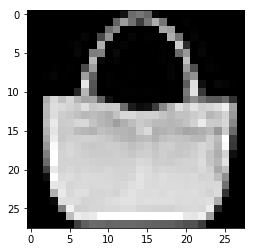

In [50]:
import matplotlib.pyplot as plt
#plt.imshow(x_train_all[0], cmap='gray')
plt.imshow(x_train_all[100], cmap='gray')
plt.show()

In [82]:
#print(x_train_all[0])

In [52]:
print(y_train_all[:10])

[9 0 0 3 0 2 7 2 5 5]


In [53]:
class_names = ['티셔츠/윗도리', '바지', '스웨터', '드레스', '코트',
              '샌들', '셔츠', '스니커즈', '가방', '앵클부츠']

In [54]:
print(class_names[y_train_all[2]])

티셔츠/윗도리


In [59]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, 
stratify=y_train_all, test_size=0.2, random_state=42)

In [55]:
np.bincount(y_train_all)

array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64)

In [61]:
np.bincount(y_train)

array([4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800, 4800],
      dtype=int64)

In [60]:
x_train = x_train / 255
x_val = x_val /255

In [91]:
x_train = x_train.reshape(-1, 784)
x_val = x_val.reshape(-1, 784)
print(x_train.shape, x_val.shape)
print(y_val.shape)

(48000, 784) (12000, 784)
(12000,)


In [64]:
print(y_train[0])
print(y_train.shape)

6
(48000,)


In [65]:
tf.keras.utils.to_categorical([0,1,3])

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [80]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
print('원핫인코딩 변환 후 :', y_train_encoded[100])
print('원핫인코딩 변환 전 :',y_train[100])
y_val_encoded = tf.keras.utils.to_categorical(y_val)

원핫인코딩 변환 후 : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
원핫인코딩 변환 전 : 5


In [90]:
fc = MultiClassNetwork(units=100, batch_size=256)
fc.fit(x_train, y_train_encoded,
      x_val=x_val, y_val=y_train_encoded, epochs=40)
plt.plot(fc.losses)
plt.plot(fc.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

.

ValueError: operands could not be broadcast together with shapes (48000,10) (12000,10) 

In [87]:
#'''
import numpy as np
class MultiClassNetwork:
    
    def __init__(self, units=10, batch_size=32, learning_rate=0.1, l1=0, l2=0):
        self.units = units         # 은닉층의 뉴런 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1 = None             # 은닉층의 가중치
        self.b1 = None             # 은닉층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.a1 = None             # 은닉층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률
        self.l1 = l1               # L1 손실 하이퍼파라미터
        self.l2 = l2               # L2 손실 하이퍼파라미터

    def forpass(self, x):
        z1 = np.dot(x, self.w1) + self.b1        # 첫 번째 층의 선형 식을 계산합니다
        self.a1 = self.sigmoid(z1)               # 활성화 함수를 적용합니다
        z2 = np.dot(self.a1, self.w2) + self.b2  # 두 번째 층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.a1.T, err) / m
        b2_grad = np.sum(err) / m
        # 시그모이드 함수까지 그래디언트를 계산합니다.
        err_to_hidden = np.dot(err, self.w2.T) * self.a1 * (1 - self.a1)
        # 은닉층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w1_grad = np.dot(x.T, err_to_hidden) / m
        b1_grad = np.sum(err_to_hidden, axis=0) / m
        return w1_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def softmax(self, z):
        # 소프트맥스 함수
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        exp_z = np.exp(z)
        return exp_z / np.sum(exp_z, axis=1).reshape(-1, 1)
 
    def init_weights(self, n_features, n_classes):
        self.w1 = np.random.normal(0, 1, 
                                   (n_features, self.units))  # (특성 개수, 은닉층의 크기)
        self.b1 = np.zeros(self.units)                        # 은닉층의 크기
        self.w2 = np.random.normal(0, 1, 
                                   (self.units, n_classes))   # (은닉층의 크기, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        np.random.seed(42)
        self.init_weights(x.shape[1], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            loss = 0
            print('.', end='')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            for x_batch, y_batch in self.gen_batch(x, y):
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss += np.sum(-y_batch*np.log(a))
            self.losses.append((loss + self.reg_loss()) / len(x))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.softmax(z)       # 활성화 함수를 적용합니다.
        err = (a - y)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 그래디언트에서 페널티 항의 미분 값을 뺍니다
        w1_grad += (self.l1 * np.sign(self.w1) + self.l2 * self.w1) / m
        w2_grad += (self.l1 * np.sign(self.w2) + self.l2 * self.w2) / m
        # 은닉층의 가중치와 절편을 업데이트합니다.
        self.w1 -= self.lr * w1_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return np.argmax(z, axis=1)  # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def reg_loss(self):
        # 은닉층과 출력층의 가중치에 규제를 적용합니다.
        return self.l1 * (np.sum(np.abs(self.w1)) + np.sum(np.abs(self.w2))) + \
               self.l2 / 2 * (np.sum(self.w1**2) + np.sum(self.w2**2))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.softmax(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        # 크로스 엔트로피 손실과 규제 손실을 더하여 리스트에 추가합니다.
        val_loss = np.sum(-y_val*np.log(a))
        self.val_losses.append((val_loss + self.reg_loss()) / len(y_val))
        
#'''

In [ ]:
케라스로 다중 분류 신경망 훈련하기

In [102]:
print('MultiClassNetwork를 사용한 스코어 :', fc.score(x_val, y_val_encoded))

MultiClassNetwork를 사용한 스코어 : 0.6079166666666667


In [92]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

In [93]:
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))

In [94]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [95]:
history = model.fit(x_train, y_train_encoded, epochs=40, 
                    validation_data=(x_val, y_val_encoded))


Epoch 1/40
1500/1500 [==============================] - 4s 3ms/step - loss: 1.4076 - accuracy: 0.6364 - val_loss: 0.9717 - val_accuracy: 0.7310
Epoch 2/40
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8471 - accuracy: 0.7412 - val_loss: 0.7531 - val_accuracy: 0.7615
Epoch 3/40
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7130 - accuracy: 0.7638 - val_loss: 0.6656 - val_accuracy: 0.7768
Epoch 4/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6472 - accuracy: 0.7789 - val_loss: 0.6133 - val_accuracy: 0.7923
Epoch 5/40
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6056 - accuracy: 0.7916 - val_loss: 0.5773 - val_accuracy: 0.8028
Epoch 6/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5751 - accuracy: 0.8015 - val_loss: 0.5511 - val_accuracy: 0.8123
Epoch 7/40
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5521 - accuracy: 0.8101 - val_loss: 0.5306 - val_accuracy:

In [97]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


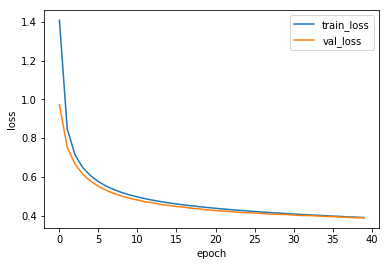

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()


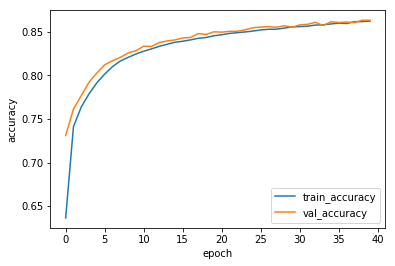

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()


In [103]:
loss, accuracy = model.evaluate(x_val, y_val_encoded, verbose=0)
print('케라스를 사용한 스코어 :', accuracy)

케라스를 사용한 스코어 : 0.8633333444595337


# 구현으로 배우는 딥러닝 이해_6.pdf

## 5. 합성곱 신경망 이해

### 5.1 합성곱 연산 --- p.2

In [172]:
from IPython.core.display import display, HTML
display(HTML('<style>div.container {width:100% !important; }</style>'))

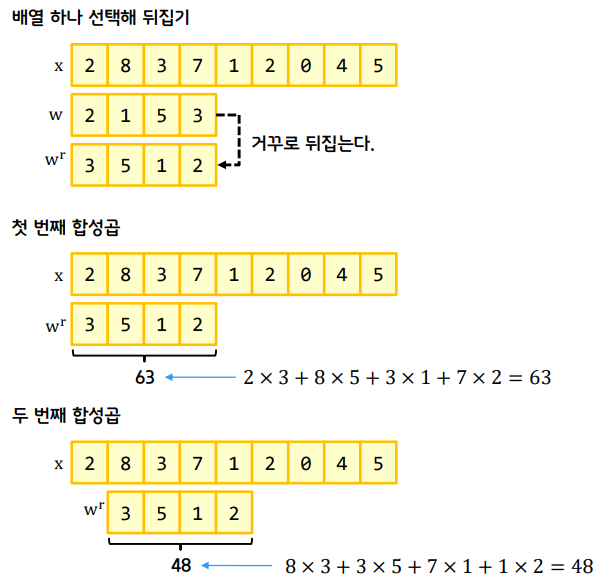

In [272]:
# reshape(-1,1) 의미
import numpy as np
x = np.arange(12).reshape(3, 4)
print('x.shape :{}'.format(x.shape))
print('x :\n{}'.format(x))

print('='*80)
print('(1) reshape(-1, 정수) 의 행(row) 위치에 -1이 들어있을 경우')
print('[x.reshape(-1,1) = shape(12,1)]')
print('x.reshape(-1,1) :\n{}'.format(x.reshape(-1,1)))
print('-'*50)
print('[x.reshape(-1,2) = shape(6,2)]')
print('x.reshape(-1,2) :\n{}'.format(x.reshape(-1,2)))
print('-'*50)
print('[x.reshape(-1,3) = shape(4,3)]')
print('x.reshape(-1,3) :\n{}'.format(x.reshape(-1,3)))
print('-'*50)
print('[x.reshape(-1,4) = shape(3,4)]')
print('x.reshape(-1,4) :\n{}'.format(x.reshape(-1,4)))

print('='*80)
print('(2) reshape(정수, -1) 의 열(column) 위치에 -1이 들어있을 경우')
print('[x.reshape(1,-1) = shape(1,12)]')
print('x.reshape(1, -1) :\n{}'.format(x.reshape(1, -1)))
print('-'*50)
print('[x.reshape(2,-1) = shape(2,6)]')
print('x.reshape(2,-1) :\n{}'.format(x.reshape(2,-1)))
print('-'*50)
print('[x.reshape(3,-1) = shape(3,4)]')
print('x.reshape(3,-1) :\n{}'.format(x.reshape(3,-1)))
print('-'*50)
print('[x.reshape(4,-1) = shape(4,3)]')
print('x.reshape(4,-1) :\n{}'.format(x.reshape(4,-1)))

print('='*80)
print('(3) reshape(-1) 인 경우')
print('x.reshape(-1) :{}'.format(x.reshape(-1)))
print('x.reshape(1,-1) :{}'.format(x.reshape(1,-1)))
print('x.reshape(-1)은 x.reshape(1, -1)과 같이 1차원 배열을 반환')
#출처: https://rfriend.tistory.com/345 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

x.shape :(3, 4)
x :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(1) reshape(-1, 정수) 의 행(row) 위치에 -1이 들어있을 경우
[x.reshape(-1,1) = shape(12,1)]
x.reshape(-1,1) :
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]]
--------------------------------------------------
[x.reshape(-1,2) = shape(6,2)]
x.reshape(-1,2) :
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]
--------------------------------------------------
[x.reshape(-1,3) = shape(4,3)]
x.reshape(-1,3) :
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
--------------------------------------------------
[x.reshape(-1,4) = shape(3,4)]
x.reshape(-1,4) :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
(2) reshape(정수, -1) 의 열(column) 위치에 -1이 들어있을 경우
[x.reshape(1,-1) = shape(1,12)]
x.reshape(1, -1) :
[[ 0  1  2  3  4  5  6  7  8  9 10 11]]
--------------------------------------------------
[x.reshape(2,-1) = shape(2,6)]
x.reshape(2,-1) :
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
----------------------------------

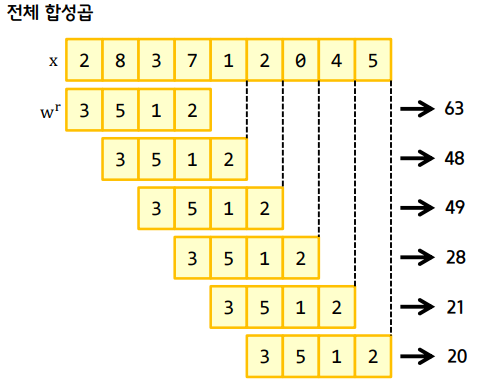

In [280]:
# p. 5

# 합성곱 구현
import numpy as np
x = np.array([2,8,3,7,1,2,0,4,5])
w = np.array([2,1,5,3])

# flip() 함수를 이용한 배열 뒤집기
w_r = np.flip(w) # 3,5,1,2로 뒤집고 싶음
# print(dir(x))
print('[배열 확인하기]')
print('x.shape :', x.shape)
print('w   :', w)
print('w_r :', w_r)
print('-'*50)
'''
2,8,3,7,1,2,0,4,5      = x       => 9개를

2,8,3,7 -------------- = x[0]
  8,3,7,1 ------------ = x[1]
    3,7,1,2 ---------- = x[2]
      7,1,2,0 -------- = x[3]
        1,2,0,4 ------ = x[4]
          2,0,4,5 ---- = x[5]   => (합성곱으로) 6개로 줄임
'''
# 넘파이의 np.dot(내적)으로 합성곱 연산

print('[내적으로 합성곱연산]')
for i in range(6):
    a = np.dot(x[i:i+4], w_r.reshape(-1,1))
    print(a)

print('-'*50)

print('[x[i:i+4] 뜯어보기]')
for i in range(6):
    print(f'x={i} \n x[{i}:{i+4}].shape: ', \
          x[i:i+4].shape,'\n', f'x[{i}:{i+4}] : ', x[i:i+4])

print('-'*50)

print('[w_r 뜯어보기]')
print('w_r.shape :', w_r.shape)
print('w_r :', w_r)
print('w_r.reshape(-1,1).shape :', w_r.reshape(-1,1).shape)
print('w_r.reshape(-1,1) :\n', w_r.reshape(-1,1))
print('-'*50)
print('np.dot(x[i:i+4], w_r.reshape(-1,1).shape :', a.shape)

print('\nQ. 나의 질문 : (4, )과 (1, 4)을 내적이 왜 가능한가? \n -> 선형대수에서는 1차원마저 맞아떨어져야 하지만, 파이썬에서는 2차원부터 맞추면 됨')

[배열 확인하기]
x.shape : (9,)
w   : [2 1 5 3]
w_r : [3 5 1 2]
--------------------------------------------------
[내적으로 합성곱연산]
[63]
[48]
[49]
[28]
[21]
[20]
--------------------------------------------------
[x[i:i+4] 뜯어보기]
x=0 
 x[0:4].shape:  (4,) 
 x[0:4] :  [2 8 3 7]
x=1 
 x[1:5].shape:  (4,) 
 x[1:5] :  [8 3 7 1]
x=2 
 x[2:6].shape:  (4,) 
 x[2:6] :  [3 7 1 2]
x=3 
 x[3:7].shape:  (4,) 
 x[3:7] :  [7 1 2 0]
x=4 
 x[4:8].shape:  (4,) 
 x[4:8] :  [1 2 0 4]
x=5 
 x[5:9].shape:  (4,) 
 x[5:9] :  [2 0 4 5]
--------------------------------------------------
[w_r 뜯어보기]
w_r.shape : (4,)
w_r : [3 5 1 2]
w_r.reshape(-1,1).shape : (4, 1)
w_r.reshape(-1,1) :
 [[3]
 [5]
 [1]
 [2]]
--------------------------------------------------
np.dot(x[i:i+4], w_r.reshape(-1,1).shape : (1,)

Q. 나의 질문 : (4, )과 (1, 4)을 내적이 왜 가능한가? 
 -> 선형대수에서는 1차원마저 맞아떨어져야 하지만, 파이썬에서는 2차원부터 맞추면 됨


In [221]:
for i in range(6):
    a=np.dot(x[i:i+4], w_r.reshape(-1,1))
    print(a)
print(a.shape)

[63]
[48]
[49]
[28]
[21]
[20]
(1,)


In [257]:
# 차원 예시
a = np.array([1,2,3,4])     #1차원 (1,4)
b = np.array([11,12,13,14]) #1차원 (1,4)
print('np.dot(a,b) :{}'.format(np.dot(a,b))) # (4,) X (,4)
print('a :{}'.format(a))
print('a.shape :{}'.format(a.shape))
print('b :{}'.format(b))
print('b.shape :{}'.format(b.shape))
print(print('b.reshape(-1,1) :\n{}'.format(b.reshape(-1,1))))
print(print('b.reshape(-1,1).shape :\n{}'.format(b.reshape(-1,1).shape)))
print('np.dot(a,b) :{}'.format(np.dot(a,b.reshape(-1,1))))

np.dot(a,b) :130
a :[1 2 3 4]
a.shape :(4,)
b :[11 12 13 14]
b.shape :(4,)
b.reshape(-1,1) :
[[11]
 [12]
 [13]
 [14]]
None
b.reshape(-1,1).shape :
(4, 1)
None
np.dot(a,b) :[130]


In [22]:
# 싸이파이로 합성곱 수행 --- p.6
from scipy.signal import convolve # 합성곱
convolve(x, w, mode = 'valid')

array([63, 48, 49, 28, 21, 20])

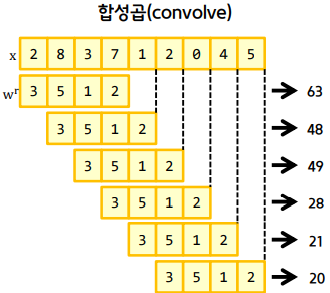
합성곱 신경망은 진짜 합성곱을 사용하지 않는다.
합성곱 대신 교차상관을 사용한다.

In [23]:
# 싸이파이로 교차상관 수행 --- p.7
from scipy.signal import correlate
correlate(x,w, mode='valid')

array([48, 57, 24, 25, 16, 39])

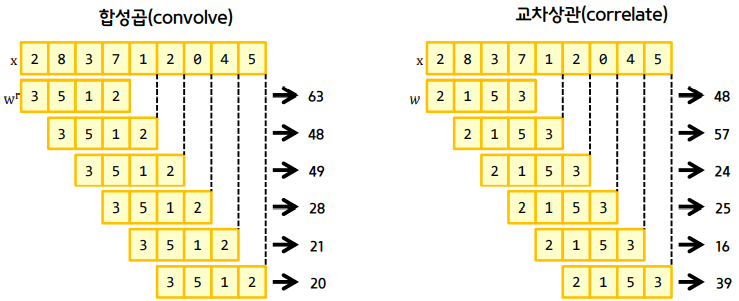
합성곱 신경망은 진짜 합성곱을 사용하지 않는다.
합성곱 대신 교차상관을 사용한다.

##### 패딩과 스트라이드 이해 - 밸리드 패딩 mode = 'valid'

- 밸리드 패딩은 원본 배열의 원소가 합성곱 연산에 참여하는 정도가 다르다.
- 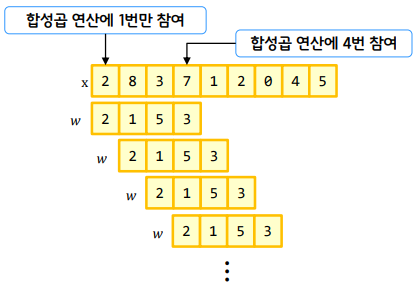
x[0]은 합성곱 연산이 1번만 참여가 되지만, x[3]을 보면 합성곱 연산이 4번이나 참여됨

In [24]:
# 풀패딩 --- p.9
correlate(x, w, mode='full')

array([ 6, 34, 51, 48, 57, 24, 25, 16, 39, 29, 13, 10])

##### 패딩과 스트라이드 이해 - 풀 패딩 mode = 'full'

- 풀 패딩은 원본 배열의 원소의 연산 참여도를 동일하게 만듦.
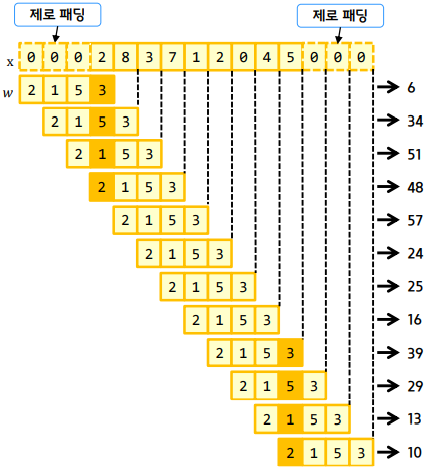

In [25]:
# 세임패딩
correlate(x,w,mode='same')

array([34, 51, 48, 57, 24, 25, 16, 39, 29])

##### 패딩과 스트라이드 이해 - 세임 패딩 mode = 'same'
- 세임 패딩은 출력 배열의 길이를 원본 배열의 원소의 길이와 동일하게 만든다.
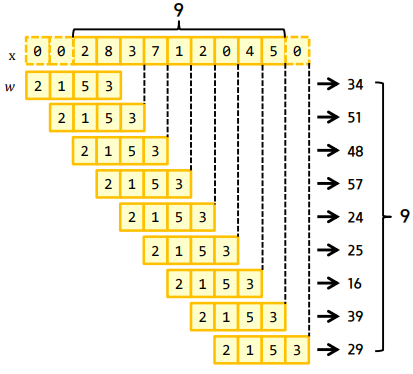
- len(x)는 9인데, 이 9와 동일하게 출력배열을 맞춰주는 것이 세임 패딩임.

In [281]:
# 2차원 배열에서 합성곱 수행 ( mode='valid' ) --- p.12

x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
w = np.array([[2,0], [0,0]])

#from scipy.signal import correlate #1차원
from scipy.signal import correlate2d #2차원
correlate2d(x, w, mode = 'valid')

array([[ 2,  4],
       [ 8, 10]])

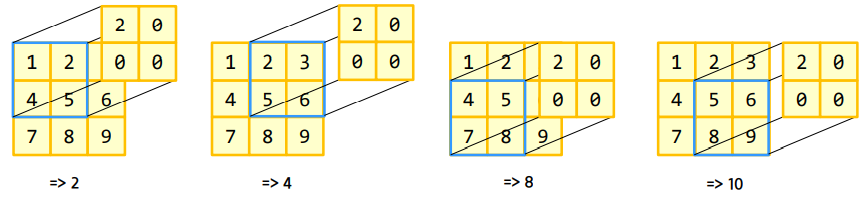

In [282]:
# 2차원 배열에서 same padding --- p.13
correlate2d(x, w, mode = 'same')

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

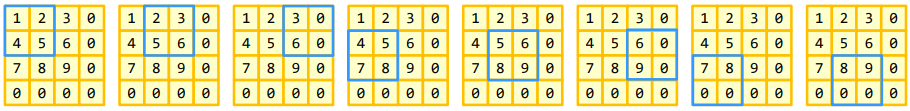

##### 2차원 배열에서 스트라이드 이해 --- p.14~15
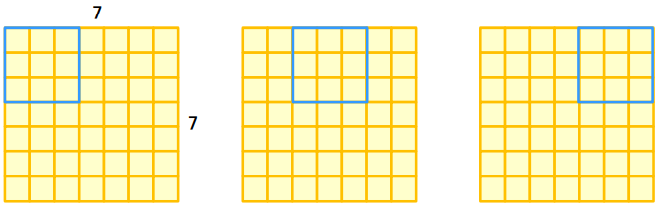
7X7 input
3X3 filter
mode = 'valid'
stride = 1
=> 5X5 output

7X7 input
3X3 filter
mode = 'valid'
stride = 2
=> 3X3 output

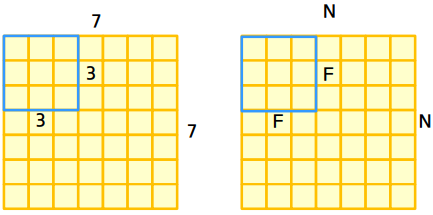
output size : (N - F) / stride + 1
ex. N=7, F=3
- stride 1 => (7 - 3) / 1 + 1 = 5
- stride 2 => (7 - 3) / 2 + 1 = 3
- stride 3 => (7 - 3) / 3 + 1 = 2.33

In [1]:
# p.29
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt
image = tf.constant([[[[1],[2],[3]],
                      [[4],[5],[6]],
                      [[7],[8],[9]]]])
print(image.shape)
plt.imshow(image.numpy().reshape(3,3), cmap='gray')

(1, 3, 3, 1)


In [28]:
a = np.array([1,2])
print('a :{}'.format(a))
print('len(a) :{}'.format(len(a)))
print('a.ndim :{}'.format(a.ndim))
print('a.shape :{}'.format(a.shape))

a :[1 2]
len(a) :2
a.ndim :1
a.shape :(2,)


In [29]:
a = np.array([[1,2],[3,4]])
b = np.array([1,2,3,4])

print('a :\n{}'.format(a))
print('len(a) :{}'.format(len(a)))
print('len(b) :{}'.format(len(b)))
print(' -> a는 리스트로 묶인 덩어리로 되어있기 때문에 2, b는 리스트 안 4개')

print('a.ndim :{}'.format(a.ndim))
print('a.shape :{}'.format(a.shape))

a :
[[1 2]
 [3 4]]
len(a) :2
len(b) :4
 -> a는 리스트로 묶인 덩어리로 되어있기 때문에 2, b는 리스트 안 4개
a.ndim :2
a.shape :(2, 2)


In [30]:
a = np.array([[[1,2],[3,4]], [[5,6],[7,8]]])
a[0][1][0]
print(len(a))
print(len(a[0]))
print(len(a[1]))
print(len(a[0][0]))
print('a.ndim :{}'.format(a.ndim))
print('a.shape :{}'.format(a.shape))

2
2
2
2
a.ndim :3
a.shape :(2, 2, 2)


In [31]:
a = np.array([ [ [ [1],[2] ], [ [3],[4] ] ] ,
               [ [ [[5],[6]], [[7],[8]] ] ]
             ])
print(len(a))
print(len(a[0]))
print(len(a[0][0][0]))

2
2
1


In [32]:
# p.34
a = [ [ [ [1],[2],[3] ],
        [ [4],[5],[6] ],
        [ [7],[8],[9] ] ] ]
'''
[ [ [ [1],[2],[3] ], [ [4],[5],[6] ], [ [7],[8],[9] ] ] ]
'''
print('len(a) :{}'.format(len(a)))
print('len(a[0]) :{}'.format(len(a[0])))
print('len(a[0][0]) :{}'.format(len(a[0][0])))
print('len(a[0][0][0]) :{}'.format(len(a[0][0][0])))


len(a) :1
len(a[0]) :3
len(a[0][0]) :3
len(a[0][0][0]) :1


In [33]:
image

<tf.Tensor: shape=(1, 3, 3, 1), dtype=int32, numpy=
array([[[[1],
         [2],
         [3]],

        [[4],
         [5],
         [6]],

        [[7],
         [8],
         [9]]]])>

weight.shape (2, 2, 1, 1)
conv2d.shape (1, 3, 3, 1)
[[12 16  9]
 [24 28 15]
 [15 17  9]]


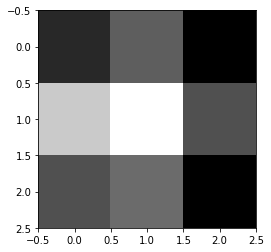

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.layers.convolutional import Conv2D
import keras
from keras.layers import *
from keras.layers import Dense
from keras import optimizers
import matplotlib.pyplot as plt
from scipy.signal import correlate2d
from scipy.signal import convolve

weight = np.array([ [ [ [1.] ], [[1.]] ] , [[[1.]],[[1.]]] ])
print("weight.shape", weight.shape)
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', 
kernel_initializer=weight_init, dtype=tf.int32)(image)
print("conv2d.shape", conv2d.shape)
print(conv2d.numpy().reshape(3,3))
plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

image.shape : (1, 3, 3, 1)
weight.shape : (2, 2, 1, 3)
conv2d.shape : (1, 3, 3, 3)
conv2d :
 tf.Tensor(
[[[[ 12 120 -12]
   [ 16 160 -16]
   [  9  90  -9]]

  [[ 24 240 -24]
   [ 28 280 -28]
   [ 15 150 -15]]

  [[ 15 150 -15]
   [ 17 170 -17]
   [  9  90  -9]]]], shape=(1, 3, 3, 3), dtype=int32)
[[12 16  9]
 [24 28 15]
 [15 17  9]]
[[120 160  90]
 [240 280 150]
 [150 170  90]]
[[-12 -16  -9]
 [-24 -28 -15]
 [-15 -17  -9]]


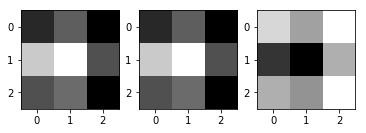

In [16]:
# p.37
print("image.shape :", image.shape)

weight = np.array([ [ [ [1., 10., -1.] ], [[1., 10., -1.]] ] , [[[1., 10., -1.]],[[1., 10., -1.]]] ])
print("weight.shape :", weight.shape)

weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', 
kernel_initializer=weight_init, dtype=tf.int32)(image)
print("conv2d.shape :", conv2d.shape)
print("conv2d :\n", conv2d)

feature_maps = np.swapaxes(conv2d, 0, 3)
#print('feature_maps.shape :', feature_maps.shape)
#print('feature_maps :\n', feature_maps)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(feature_map.reshape(3,3),cmap='gray')
#print(conv2d.numpy().reshape(3,3))
#plt.imshow(conv2d.numpy().reshape(3,3), cmap='gray')
plt.show()

In [60]:
a = np.array([ [1,2],[3,4] ])
a

array([[1, 2],
       [3, 4]])

In [61]:
np.swapaxes(a, 0, 1)

array([[1, 3],
       [2, 4]])

In [63]:
# p.40
a = np.arange(24).reshape(2,3,4)
a

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [64]:
# p.40
b = np.swapaxes(a,0,2)
b[0][0][1]

12

In [68]:
# p.41
a = np.arange(27).reshape(1,3,3,3)
a

array([[[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]]])

In [ ]:
'''
(0, 0, 0, 0) = 0
(0, 0, 0, 1) = 1
(0, 0, 0, 2) = 2
(0, 0, 1, 0) = 3
(0, 0, 1, 1) = 4
(0, 0, 1, 2) = 5
(0, 0, 2, 0) = 6
(0, 0, 2, 1) = 7
(0, 0, 2, 2) = 8

(0, 1, 0, 0) = 9
(0, 1, 0, 1) = 10
(0, 1, 0, 2) = 11
(0, 1, 1, 0) = 12
(0, 1, 1, 1) = 13
(0, 1, 1, 2) = 14
(0, 1, 2, 0) = 15
(0, 1, 2, 1) = 16
(0, 1, 2, 2) = 17

(0, 2, 0, 0) = 18
(0, 2, 0, 1) = 19
(0, 2, 0, 2) = 20
(0, 2, 1, 0) = 21
(0, 2, 1, 1) = 22
(0, 2, 1, 2) = 23
(0, 2, 2, 0) = 24
(0, 2, 2, 1) = 25
(0, 2, 2, 2) = 26
'''

In [6]:
image = tf.constant( [[ 
                        [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                        [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                        [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                        [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                        [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]]
                     ]], dtype=np.float32)

print('image.shape :', image.shape)

# maps = image #하면 에러뜸
maps = np.swapaxes(image, 0, 3)
print('type(maps) : {}'.format(type(maps)))
print('maps.shape : {}'.format((maps.shape)))
print('map :\n', map) # 하나짜리
print('-'*50)

for i, map in enumerate(maps):
    print(map.reshape(5,5)) # 3개짜리를 5x5로 바꿈
    
    

image.shape : (1, 5, 5, 3)
type(maps) : <class 'numpy.ndarray'>
maps.shape : (3, 5, 5, 1)
map :
 [[[1.]
  [1.]
  [1.]
  [1.]
  [0.]]

 [[1.]
  [1.]
  [1.]
  [1.]
  [0.]]

 [[0.]
  [0.]
  [0.]
  [1.]
  [1.]]

 [[0.]
  [1.]
  [1.]
  [1.]
  [0.]]

 [[0.]
  [1.]
  [1.]
  [0.]
  [0.]]]
--------------------------------------------------
[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]


In [11]:
# p.48
weight = np.array( [ 
[ [ [1],[0],[-1] ], [ [0],[-1],[0] ], [ [1],[0], [0] ] ],
[ [ [0],[-1],[0] ], [ [1], [1],[1] ], [ [0],[-1],[0] ] ],
[ [ [1],[1], [0] ], [ [0],[-1],[0] ], [ [1],[0],[-1] ] ]
                   ] )
print('weight.shape :', weight.shape)
print(weight)

maps = np.swapaxes(weight, 1, 2)
print('maps.shape :', maps.shape)
print(maps)

maps = np.swapaxes(maps, 0, 1)
print('maps.shape :', maps.shape)
print(maps)

for i, map in enumerate(maps):
    print(map.reshape(3,3))

weight.shape : (3, 3, 3, 1)
[[[[ 1]
   [ 0]
   [-1]]

  [[ 0]
   [-1]
   [ 0]]

  [[ 1]
   [ 0]
   [ 0]]]


 [[[ 0]
   [-1]
   [ 0]]

  [[ 1]
   [ 1]
   [ 1]]

  [[ 0]
   [-1]
   [ 0]]]


 [[[ 1]
   [ 1]
   [ 0]]

  [[ 0]
   [-1]
   [ 0]]

  [[ 1]
   [ 0]
   [-1]]]]
maps.shape : (3, 3, 3, 1)
[[[[ 1]
   [ 0]
   [ 1]]

  [[ 0]
   [-1]
   [ 0]]

  [[-1]
   [ 0]
   [ 0]]]


 [[[ 0]
   [ 1]
   [ 0]]

  [[-1]
   [ 1]
   [-1]]

  [[ 0]
   [ 1]
   [ 0]]]


 [[[ 1]
   [ 0]
   [ 1]]

  [[ 1]
   [-1]
   [ 0]]

  [[ 0]
   [ 0]
   [-1]]]]
maps.shape : (3, 3, 3, 1)
[[[[ 1]
   [ 0]
   [ 1]]

  [[ 0]
   [ 1]
   [ 0]]

  [[ 1]
   [ 0]
   [ 1]]]


 [[[ 0]
   [-1]
   [ 0]]

  [[-1]
   [ 1]
   [-1]]

  [[ 1]
   [-1]
   [ 0]]]


 [[[-1]
   [ 0]
   [ 0]]

  [[ 0]
   [ 1]
   [ 0]]

  [[ 0]
   [ 0]
   [-1]]]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [83]:
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', 
kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)

feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


In [14]:
# p.47
import tensorflow as tf
import numpy as np
import keras
from keras.layers import *
import matplotlib.pyplot as plt

image = tf.constant( [[ 
                        [[1,0,1],[1,1,1],[1,1,1],[0,0,1],[0,1,0]], 
                        [[0,0,1],[1,1,1],[1,1,1],[1,1,1],[0,0,0]], 
                        [[0,0,0],[0,0,0],[1,1,0],[1,1,1],[1,0,1]], 
                        [[0,0,0],[0,0,1],[1,1,1],[1,1,1],[0,1,0]], 
                        [[0,1,0],[1,1,1],[1,1,1],[0,0,0],[0,0,0]] 
                     ]], dtype=np.float32)
print('image.shape :', image.shape)

maps = np.swapaxes(image, 0, 3)
print('maps.shape :', maps.shape)

for i, map in enumerate(maps):
    print(map.reshape(5,5))
    
print('maps.shape :', maps.shape)

image.shape : (1, 5, 5, 3)
maps.shape : (3, 5, 5, 1)
[[1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 0. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
[[0. 1. 1. 0. 1.]
 [0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0.]
 [0. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0.]]
[[1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0.]]
maps.shape : (3, 5, 5, 1)


In [12]:
# p.48
weight = np.array( [ 
[[[1],[0],[-1]], [[0],[-1],[0]], [[1],[0],[0]]],
[[[0],[-1],[0]], [[1],[1],[1]], [[0],[-1],[0]]],
[[[1],[1],[0]], [[0],[-1],[0]], [[1],[0],[-1]]]
] )
maps = np.swapaxes(weight, 1, 2)
maps = np.swapaxes(maps, 0, 1)
for i, map in enumerate(maps):
    print(map.reshape(3,3))

[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [13]:
# p.49
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=3, padding='valid', 
kernel_initializer=weight_init)(image)
print("conv2d.shape", conv2d.shape)
feature_maps = np.swapaxes(conv2d, 0, 3)
for i, feature_map in enumerate(feature_maps):
    print(feature_map.reshape(3,3))

conv2d.shape (1, 3, 3, 1)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]


In [18]:
# p.50
weight = np.array( [ 
[[[1,1],[0,1],[-1,-1]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[0,0]]],
[[[0,0],[-1,0],[0,0]], [[1,1],[1,1],[1,1]], [[0,0],[-1,0],[0,0]]],
[[[1,1],[1,1],[0,0]], [[0,0],[-1,0],[0,0]], [[1,1],[0,1],[-1,-1]]]
] )
print('weight.shape :', weight.shape)

maps = np.swapaxes(weight, 1, 2)
print('maps.shape :', maps.shape)
maps = np.swapaxes(maps, 0, 1)
print('maps.shape :', maps.shape)
for map in maps:
    map = np.swapaxes(map, 1, 2)
    print('map.shape :', map.shape)
    map = np.swapaxes(map, 0, 1)
    print('map.shape :', map.shape)
    for filter in map:
        print(filter)

weight.shape : (3, 3, 3, 2)
maps.shape : (3, 3, 3, 2)
maps.shape : (3, 3, 3, 2)
map.shape : (3, 2, 3)
map.shape : (2, 3, 3)
[[1 0 1]
 [0 1 0]
 [1 0 1]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
map.shape : (3, 2, 3)
map.shape : (2, 3, 3)
[[ 0 -1  0]
 [-1  1 -1]
 [ 1 -1  0]]
[[1 0 1]
 [0 1 0]
 [1 0 1]]
map.shape : (3, 2, 3)
map.shape : (2, 3, 3)
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]


In [19]:
# p.51
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=2, kernel_size=3, padding='valid', 
kernel_initializer=weight_init)(image)
print("conv2d.shape :", conv2d.shape) # ( 1,3,3,2)

feature_maps = np.swapaxes(conv2d, 0, 3)
for feature_map in feature_maps:
    print(feature_map.reshape(3,3))

conv2d.shape : (1, 3, 3, 2)
[[ 3. -1.  3.]
 [-2.  0.  2.]
 [ 1.  3.  4.]]
[[7. 5. 7.]
 [2. 6. 7.]
 [5. 7. 8.]]


In [31]:
# 풀링 연산 --- p.57

image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [32]:
# 풀링 연산 --- p.58

image = tf.constant([[[[4],[3]],[[2],[1]]]], dtype=np.float32)
pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='same')(image)
print(pool.shape)
print(pool.numpy())

(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


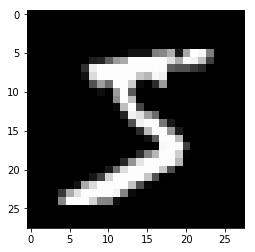

(28, 28)


In [20]:
# Loading MNIST Data --- p.59

mnist = keras.datasets.mnist
class_names = ['0','1','2','3','4','5','6','7','8','9'] 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.
img = train_images[0]
plt.imshow( img, cmap='gray')
plt.show()
print(img.shape)

conv2d.shape (1, 14, 14, 5)
feature_maps.shape : (5, 14, 14, 1)


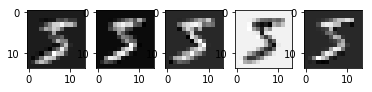

In [21]:
# Loading MNIST Data --- p.60

# convolution 함

# 원래 이미지(3차원)을 4차원으로 만들어 줌
img = img.reshape(-1,28,28,1)
img = tf.convert_to_tensor(img)# 4차원으로 만든 이미지를 텐서로 저장
#print("weight.shape", weight.shape)

weight_init = keras.initializers.RandomNormal(stddev=0.01)
conv2d = keras.layers.Conv2D(filters=5, kernel_size=3, padding='same', 
strides=(2,2), kernel_initializer=weight_init)(img)
print("conv2d.shape", conv2d.shape)

feature_maps = np.swapaxes(conv2d, 0, 3)
print('feature_maps.shape :', feature_maps.shape)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(14,14), cmap='gray')
plt.show()

(1, 7, 7, 5)


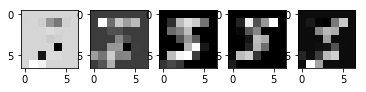

In [35]:
# Loading MNIST Data --- p.60

# convolution한 것으로 maxpooling 함

pool = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
print(pool.shape)
feature_maps = np.swapaxes(pool, 0, 3)
for i, feature_map in enumerate(feature_maps):
    plt.subplot(1,5,i+1), plt.imshow(feature_map.reshape(7,7), cmap='gray')
plt.show()

In [ ]:
# 그림 3x5 출력

<function matplotlib.pyplot.show(*args, **kw)>

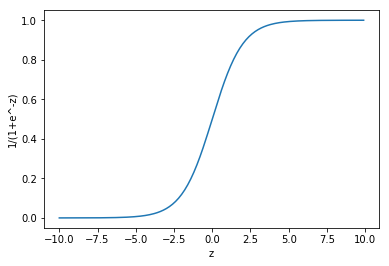

In [36]:
# p.65
zs = np.arange(-10,10,0.1)
gs = [1 / (1 + np.exp(-z)) for z in zs]

plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('1/(1+e^-z)')
plt.show

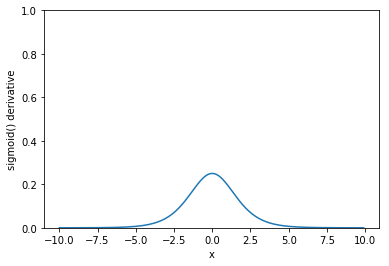

In [37]:
# p.65
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

zs = np.arange(-10., 10., 0.1)
gs = [sigmoid(z) * (1 - sigmoid(z)) for z in zs] # 미분값
plt.plot(zs, gs)
plt.ylim(0,1)
plt.xlabel('x')
plt.ylabel('sigmoid() derivative')
plt.show()

In [38]:
# 하이퍼 볼릭 탄젠트 --- p.66
zs = np.arange(-10, 10, 0.1)


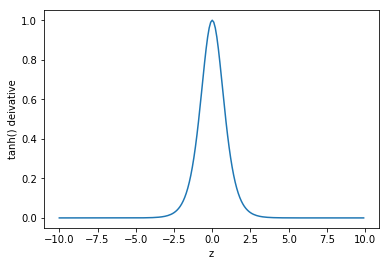

In [39]:
zs = np.arange(-10., 10., 0.1)
gs = [ (1 - np.tanh(z)) * (1 + np.tanh(z)) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('tanh() deivative')
plt.show()

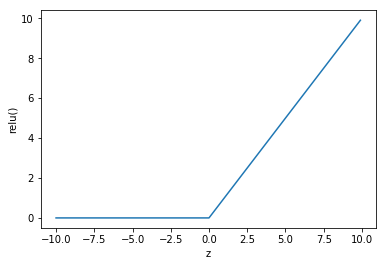

In [40]:
# 렐루 --- p.67
def relu(x):
    return np.maximum(x,0)

zs = np.arange(-10., 10., 0.1)
gs = [relu(z) for z in zs]
plt.plot(zs, gs)
plt.xlabel('z')
plt.ylabel('relu()')
plt.show()

### 5.2 합성곱 신경망 구현 --- p.72

In [48]:
import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)
#         print('self.conv_w.shape',self.conv_w.shape)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)
#         print('c_out',c_out)
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)
#         print('r_out',r_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [ ]:
# p.83~85

In [41]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, 
                                                  test_size=0.2, random_state=42)

In [43]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [44]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_val = x_val.reshape(-1, 28, 28, 1)

In [45]:
x_train.shape

(48000, 28, 28, 1)

In [46]:
x_train = x_train / 255
x_val = x_val / 255

In [49]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)
cn.fit(x_train, y_train_encoded, 
       x_val=x_val, y_val=y_val_encoded, epochs=20)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 .......................................................................................................................................................................................................................................................................................................................................................................................
에포크 2 ......................................................................................................................................................................................................................................

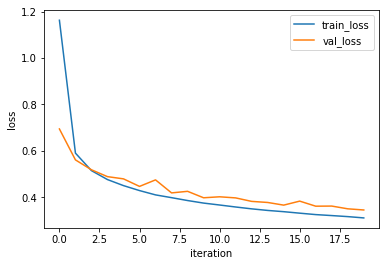

In [50]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [51]:
cn.score(x_val, y_val_encoded)

0.87975

### 5.3 케라스로 합성곱 신경망 구현 --- p.86

In [52]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [53]:
conv1 = tf.keras.Sequential()
conv1.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))

In [54]:
conv1.add(MaxPooling2D((2, 2)))

In [55]:
conv1.add(Flatten())

In [56]:
conv1.add(Dense(100, activation='relu'))
conv1.add(Dense(10, activation='softmax'))

In [57]:
conv1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 1960)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               196100    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
_________________________________________________________________


In [58]:
conv1.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history = conv1.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.4632 - accuracy: 0.8375 - val_loss: 0.3570 - val_accuracy: 0.8734
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3208 - accuracy: 0.8843 - val_loss: 0.2987 - val_accuracy: 0.8924
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2732 - accuracy: 0.9001 - val_loss: 0.2812 - val_accuracy: 0.8999
Epoch 4/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2430 - accuracy: 0.9116 - val_loss: 0.2621 - val_accuracy: 0.9041
Epoch 5/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2163 - accuracy: 0.9197 - val_loss: 0.2590 - val_accuracy: 0.9085
Epoch 6/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1938 - accuracy: 0.9270 - val_loss: 0.2480 - val_accuracy: 0.9133
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1738 - accuracy: 0.9355 - val_loss: 0.2551 - val_accur

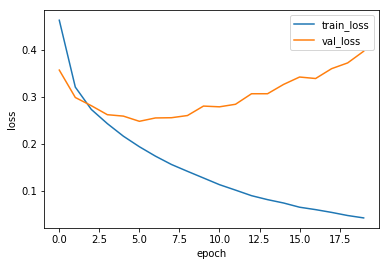

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

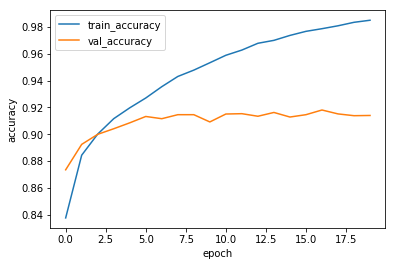

In [61]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [62]:
# 드롭아웃 p. 93~

In [63]:
from tensorflow.keras.layers import Dropout
conv2 = tf.keras.Sequential()
conv2.add(Conv2D(10, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
conv2.add(MaxPooling2D((2, 2)))
conv2.add(Flatten())
conv2.add(Dropout(0.5))
conv2.add(Dense(100, activation='relu'))
conv2.add(Dense(10, activation='softmax'))

In [64]:
conv2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 10)        100       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1960)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               196100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 197,210
Trainable params: 197,210
Non-trainable params: 0
________________________________________________

In [66]:
conv2.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])
history = conv2.fit(x_train, y_train_encoded, epochs=20, 
                    validation_data=(x_val, y_val_encoded))

Epoch 1/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3784 - accuracy: 0.8619 - val_loss: 0.3182 - val_accuracy: 0.8877
Epoch 2/20
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3348 - accuracy: 0.8779 - val_loss: 0.2889 - val_accuracy: 0.8989
Epoch 3/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3053 - accuracy: 0.8866 - val_loss: 0.2687 - val_accuracy: 0.9054
Epoch 4/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2873 - accuracy: 0.8949 - val_loss: 0.2602 - val_accuracy: 0.9038
Epoch 5/20
1500/1500 [==============================] - 14s 10ms/step - loss: 0.2715 - accuracy: 0.8982 - val_loss: 0.2503 - val_accuracy: 0.9089
Epoch 6/20
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2583 - accuracy: 0.9041 - val_loss: 0.2527 - val_accuracy: 0.9103
Epoch 7/20
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2477 - accuracy: 0.9089 - val_loss: 0.2439 - val_ac

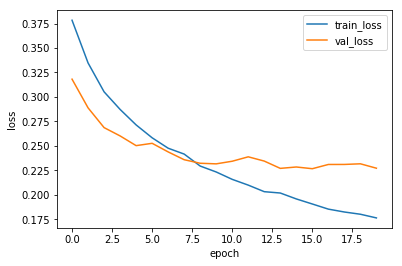

In [67]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

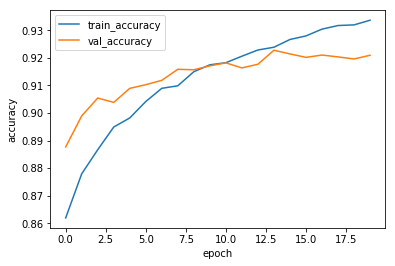

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# 어제 개념 설명 소스 위주 분석(코드 반복될 수도 있음) 

In [2]:
import tensorflow as tf

In [3]:
(x_train_all, y_train_all), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all,
                                                 test_size=0.2, random_state=42)

In [7]:
print('y_train[0] :{}'.format(y_train[0]))
print('y_train.shape :{}'.format(y_train.shape))
print('x_train.shape :{}'.format(x_train.shape))

y_train[0] :6
y_train.shape :(48000,)
x_train.shape :(48000, 28, 28)


In [9]:
y_train_encoded = tf.keras.utils.to_categorical(y_train)
y_val_encoded = tf.keras.utils.to_categorical(y_val)

In [11]:
print('y_train_encoded.shape :{}'.format(y_train_encoded.shape))

y_train_encoded.shape :(48000, 10)


In [12]:
print(y_train_encoded[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [13]:
print('x_train.shape :{}'.format(x_train.shape))
print('x_val.shape :{}'.format(x_val.shape))

x_train.shape :(48000, 28, 28)
x_val.shape :(12000, 28, 28)


In [14]:
x_train = x_train.reshape(-1,28,28,1)
x_val = x_val.reshape(-1,28,28,1)
print('x_train.shape :{}'.format(x_train.shape))
print('x_val.shape :{}'.format(x_val.shape))

x_train.shape :(48000, 28, 28, 1)
x_val.shape :(12000, 28, 28, 1)


In [15]:
x_train = x_train / 255
x_val = x_val / 255

In [166]:
# 복붙해서 가져온건 되는데

import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)
#         print('self.conv_w.shape',self.conv_w.shape)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)
#         print('c_out',c_out)
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)
#         print('r_out',r_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1     # 첫 번째 층의 선형 식을 계산합니다
        a1 = tf.nn.relu(z1)                          # 활성화 함수를 적용합니다
        z2 = tf.matmul(a1, self.w2) + self.b2        # 두 번째 층의 선형 식을 계산합니다.
        return z2
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
 
            print()
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)       # 정방향 계산을 수행합니다.
            # 손실을 계산합니다.
            loss = tf.nn.softmax_cross_entropy_with_logits(y, z)
            loss = tf.reduce_mean(loss)

        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        # 가중치에 대한 그래디언트를 계산합니다.
        grads = tape.gradient(loss, weights_list)
        # 가중치를 업데이트합니다.
        self.optimizer.apply_gradients(zip(grads, weights_list))
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))

    def get_loss(self, x, y):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        # 손실을 계산하여 저장합니다.
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, z))
        return loss.numpy()

In [163]:
# 이건 또 왜 안될까..? 에러뜨니 다시 쳐보기!!!!!

import tensorflow as tf

class ConvolutionNetwork:
    
    def __init__(self, n_kernels=10, units=10, batch_size=32, learning_rate=0.1):
        self.n_kernels = n_kernels  # 합성곱의 커널 개수
        self.kernel_size = 3        # 커널 크기
        self.optimizer = None       # 옵티마이저
        self.conv_w = None          # 합성곱 층의 가중치
        self.conv_b = None          # 합성곱 층의 절편
        self.units = units          # 은닉층의 뉴런 개수
        self.batch_size = batch_size  # 배치 크기
        self.w1 = None              # 은닉층의 가중치
        self.b1 = None              # 은닉층의 절편
        self.w2 = None              # 출력층의 가중치
        self.b2 = None              # 출력층의 절편
        self.a1 = None              # 은닉층의 활성화 출력
        self.losses = []            # 훈련 손실
        self.val_losses = []        # 검증 손실
        self.lr = learning_rate     # 학습률

    def forpass(self, x):
        # 3x3 합성곱 연산을 수행합니다.
#         print('x.shape',x.shape)
#         print('self.conv_w.shape',self.conv_w.shape)
#         print('self.conv_w',self.conv_w)
        c_out = tf.nn.conv2d(x, self.conv_w, strides=1, padding='SAME') + self.conv_b
        # 렐루 활성화 함수를 적용합니다.
#         print('c_out.shape',c_out.shape)
#         print('c_out',c_out)
        r_out = tf.nn.relu(c_out)
#         print('r_out.shape',r_out.shape)
#         print('r_out',r_out)
        # 2x2 최대 풀링을 적용합니다.
        p_out = tf.nn.max_pool2d(r_out, ksize=2, strides=2, padding='VALID')
        # 첫 번째 배치 차원을 제외하고 출력을 일렬로 펼칩니다.
#         print('p_out.shape',p_out.shape)
#         print('p_out',p_out)
        f_out = tf.reshape(p_out, [x.shape[0], -1])
#         print('f_out.shape',f_out.shape)
        z1 = tf.matmul(f_out, self.w1) + self.b1
        a1 = tf.nn.relu(z1)
        z2 = tf.matmul(a1, self.w2) + self.b2
        
    
    def init_weights(self, input_shape, n_classes):
        g = tf.initializers.glorot_uniform()
        self.conv_w = tf.Variable(g((3, 3, 1, self.n_kernels)))
        self.conv_b = tf.Variable(np.zeros(self.n_kernels), dtype=float)
        n_features = 14 * 14 * self.n_kernels
        self.w1 = tf.Variable(g((n_features, self.units)))          # (특성 개수, 은닉층의 크기)
        self.b1 = tf.Variable(np.zeros(self.units), dtype=float)    # 은닉층의 크기
        self.w2 = tf.Variable(g((self.units, n_classes)))           # (은닉층의 크기, 클래스 개수)
        self.b2 = tf.Variable(np.zeros(n_classes), dtype=float)     # 클래스 개수
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        self.init_weights(x.shape, y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        self.optimizer = tf.optimizers.SGD(learning_rate=self.lr)
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                self.training(x_batch, y_batch)
                # 배치 손실을 기록합니다.
                batch_losses.append(self.get_loss(x_batch, y_batch))
            print()
            self.losses.append(np.mean(batch_losses))
            # 배치 손실 평균내어 훈련 손실 값으로 저장합니다.
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.val_losses.append(self.get_loss(x_val, y_val))

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        bins = len(x) // self.batch_size                   # 미니배치 횟수
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                    # 샘플 개수를 저장합니다.
        with tf.GradientTape() as tape:
            z = self.forpass(x)
            loss = tf.nn.softmax_cross_entropy_with_logits(y,z)
            loss = tf.reduce_mean(loss)
            
        weights_list = [self.conv_w, self.conv_b,
                        self.w1, self.b1, self.w2, self.b2]
        grads = tape.gradient(loss, weights_list)
        self.optimizer.apply_gradients(zip(grads, weights_list))

    def get_loss(self, x, y):
        z = self.forpass(x)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y,z))
        return loss.numpy()
   
    def predict(self, x):
        z = self.forpass(x)                 # 정방향 계산을 수행합니다.
        return np.argmax(z.numpy(), axis=1) # 가장 큰 값의 인덱스를 반환합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == np.argmax(y, axis=1))
    



In [167]:
cn = ConvolutionNetwork(n_kernels=10, units=100, batch_size=128, learning_rate=0.01)

In [168]:
cn.fit(x_train, y_train_encoded,
      x_val=x_val, y_val=y_val_encoded, epochs=1)

에포크 0 .......................................................................................................................................................................................................................................................................................................................................................................................


In [156]:
x = tf.Variable(np.array([1.0, 2.0, 3.0]))
with tf.GradientTape() as tape:
    
    y = tf.nn.softmax(x)
print(tape.gradient(y,x))

tf.Tensor([1.99908031e-17 5.43406367e-17 1.47713165e-16], shape=(3,), dtype=float64)


In [169]:
cn.score(x_val, y_val_encoded)

0.7661666666666667

In [157]:
class Connector:
    def __enter__(self):
        print('DB 연결함')
    def __exit__(self, type, value, tb):
        print('DB 연결 끊음')
        

In [159]:
with Connector() as db:
    print('DB_작업중...')
    
print(' -> 객체 만들고 내부적으로 enter로 부름 그 다음 with가 실행되고 나서, exit으로 닫힘 ')

DB 연결함
DB_작업중...
DB 연결 끊음
 -> 객체 만들고 내부적으로 enter로 부름 그 다음 with가 실행되고 나서, exit으로 닫힘 


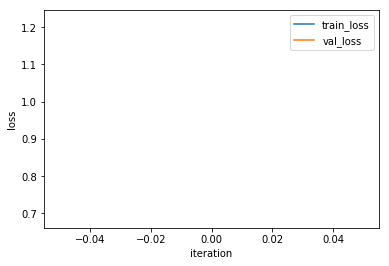

In [171]:
import matplotlib.pyplot as plt
plt.plot(cn.losses)
plt.plot(cn.val_losses)
plt.ylabel('loss')
plt.xlabel('iteration')
plt.legend(['train_loss', 'val_loss'])
plt.show()